**Appendix**
1. Problem Statement
2. Questions answered and different kind of analysis performed
3. Insights based on analysis
4. Business insights
5. Recommendations

**Problem Statement**
- Data Cleaning
- Missing value detection
- Handling missing values
- Unnesting columns having multiple values in a single column
- Preparing data for detailed analysis

**This document show data analysis covering below in detail**
- Reading data & checking for various metrics.
- Preprocessing of data.
- Detection of missing values and it's handling.
- Cleaning data.
- Handling categorical attributes.
- Statistical Summary such as
    -> 5 point summary for numerical values
    -> Oldest movie & tv show
    -> Longest and Shortest movie and tv show considering duration.
- Types of content on the platform and its contribution.
- Distribution of different types of content as per rating.
- Distribution of different types of content as per release year.
- Year-wise addition of different types of content on the platform.
- Month-wise addition of different types of content on the platform.
- Day-wise addition of different types of content on the platform.
- Number of unique actors, directors, countries, genre & rating.
- Distribution of content genre-wise.
- Top 10 genre for movies and tv shows.
- Top 20 countries with most content, most movies & tv shows.
- Top 20 content, movie & tv shows producing directors.
- Top 20 actors with most content, movies & tv shows.
- Genre-wise distribution of actor and directors content for different types of content.
- Distribution of movies and tv shows across genres with repect to duration.
- Distribution of movies and tv shows across countries with respect to duration.
- Correlation between different attributes for movies and tv shows.
- Correlation between different genres of movies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading Data**

In [2]:
data = pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Pre-processing**

In [3]:
#Checking the shape of data. 
# Observation -> We can see there are 8807 rows and 12 columns in the dataset
data.shape

(8807, 12)

In [4]:
#Checking DataType, Non-null values and column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#Columns in the dataset
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#Data Types for each column
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
# Statistical Summary for available numerical data. 
# Observation -> 
# 50% content on the platform were released in 4 years between 2017 - 2021, compared to remaining 50% which were released between window of 92 Years.
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Missing Value Detection**

In [8]:
# Count of missing values in each column
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Percentage of missing data in each column
# Observation -> There are significant amount of null values in columns (director, cast & country)
(data.isna().sum()/data.shape[0]) *100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

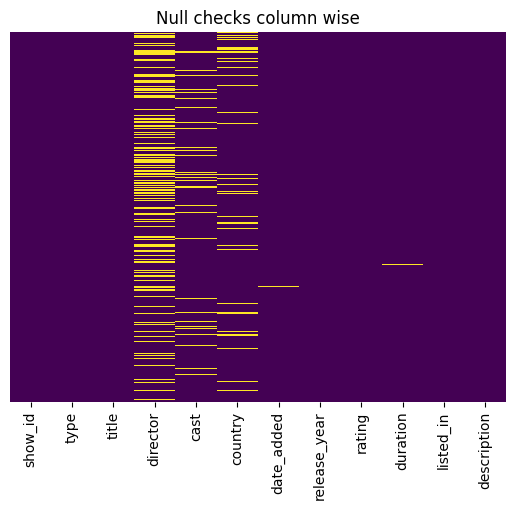

In [10]:
# Plotting the amount of null values columnwise using a heat map
# Observation
# There are significant amount of missing values in director, cast and country columns.
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null checks column wise')
plt.savefig(fname='NullChecks_boxplot10.png')
plt.show()

In [11]:
# Count of non-null values in each column
data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

**Handling missing values & cleaning data**

In [12]:
#Below we can see that for below three rows data for duration is kept in rating, as this is very low in number so we can assign that
data[data['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [13]:
# Index of rows having missing value as duration
index = data[data['duration'].isna()].index
index

Index([5541, 5794, 5813], dtype='int64')

In [14]:
# Imputating missing values of duration from rating column
data.loc[index,'duration'] = data.loc[index,'rating']

In [15]:
# Checking for any null value after imputating the missing values for duration.
data[data['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [16]:
# Replacing wrong value of rating column to missing 
data.loc[index,'rating'] = None

In [17]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [18]:
# Imputating missing values for columns director, cast & country.
data.fillna({'director':'Unknown Director'},inplace=True)
data.fillna({'cast':'Unknown Cast'},inplace=True)
data.fillna({'country':'Unknown Country'},inplace=True)

In [19]:
# Count of null values in each column after handling nulls in majority of columns
data.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [20]:
# As there are very few missing values in column date_added and rating. Those rows can be dropped
data.dropna(subset=['date_added','rating'],axis=0,inplace=True)

In [21]:
# We can see now we have a clean data with no missing values
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Handling Categorical Attributes**

In [22]:
# Converting duration column from categorical variable to numerical to show number of seasons for TV shows and minutes for Movies
def duration(s):
    return int(s.split(" ")[0])

data['duration'] = data['duration'].apply(duration)

In [23]:
# Converting date_added column to show in datetime format
data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), format='%B %d, %Y')

In [24]:
# Adding columns day, month and year when a particular content was added on the platform
data['day_added'],data['month_added'],data['year_added'] = data['date_added'].dt.day_name(), data['date_added'].dt.month_name(), data['date_added'].dt.year
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Saturday,September,2021
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,September,2021
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,September,2021


**Statistical Summary of Data**

In [25]:
# Mean runtime for different types of content.
# Obsevation -> For movie mean duration is approx 100 minutes and for TV show it is close to 2 seasons.
data.groupby('type')['duration'].mean()

type
Movie      99.584884
TV Show     1.751877
Name: duration, dtype: float64

In [26]:
# Median runtime for different types of content.
# Obsevation -> For movie mean duration is approx 98 minutes and for TV show it is 1 season.
# We can see the difference b/w mean and median for TV shows is significant.
data.groupby('type')['duration'].median()

type
Movie      98.0
TV Show     1.0
Name: duration, dtype: float64

In [27]:
# Longest movie (Considering duration) -> 312 minutes
movie_data = data[data['type'] == 'Movie']
movie_data[movie_data['duration'] == movie_data['duration'].max()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown Director,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",Friday,December,2018


In [28]:
# Shortest movie (Considering duration) -> 3 minutes
movie_data[movie_data['duration'] == movie_data['duration'].min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",Unknown Cast,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",Tuesday,June,2019


In [29]:
# Longest running TV show -> 17 Seasons
tv_data = data[data['type'] == 'TV Show']
tv_data[tv_data['duration'] == tv_data['duration'].max()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
548,s549,TV Show,Grey's Anatomy,Unknown Director,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,Saturday,July,2021


In [30]:
# More than 50% of TV shows available on platform has 1 season only.
tv_data[tv_data['duration'] == tv_data['duration'].min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,September,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown Country,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Friday,September,2021
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown Director,Unknown Cast,Unknown Country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",Friday,September,2021
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",Unknown Country,2021-09-23,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",Thursday,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8775,s8776,TV Show,Yeh Meri Family,Unknown Director,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,2018-08-31,2018,TV-PG,1,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal...",Friday,August,2018
8780,s8781,TV Show,Yo-Kai Watch,Unknown Director,"Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...",United States,2016-04-01,2015,TV-Y7,1,"Anime Series, Kids' TV",Nate frees a mythical being trapped in a magic...,Friday,April,2016
8783,s8784,TV Show,Yoko,Unknown Director,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",Unknown Country,2018-06-23,2016,TV-Y,1,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",Saturday,June,2018
8785,s8786,TV Show,YOM,Unknown Director,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",Unknown Country,2018-06-07,2016,TV-Y7,1,Kids' TV,"With the mind of a human being, and the body o...",Thursday,June,2018


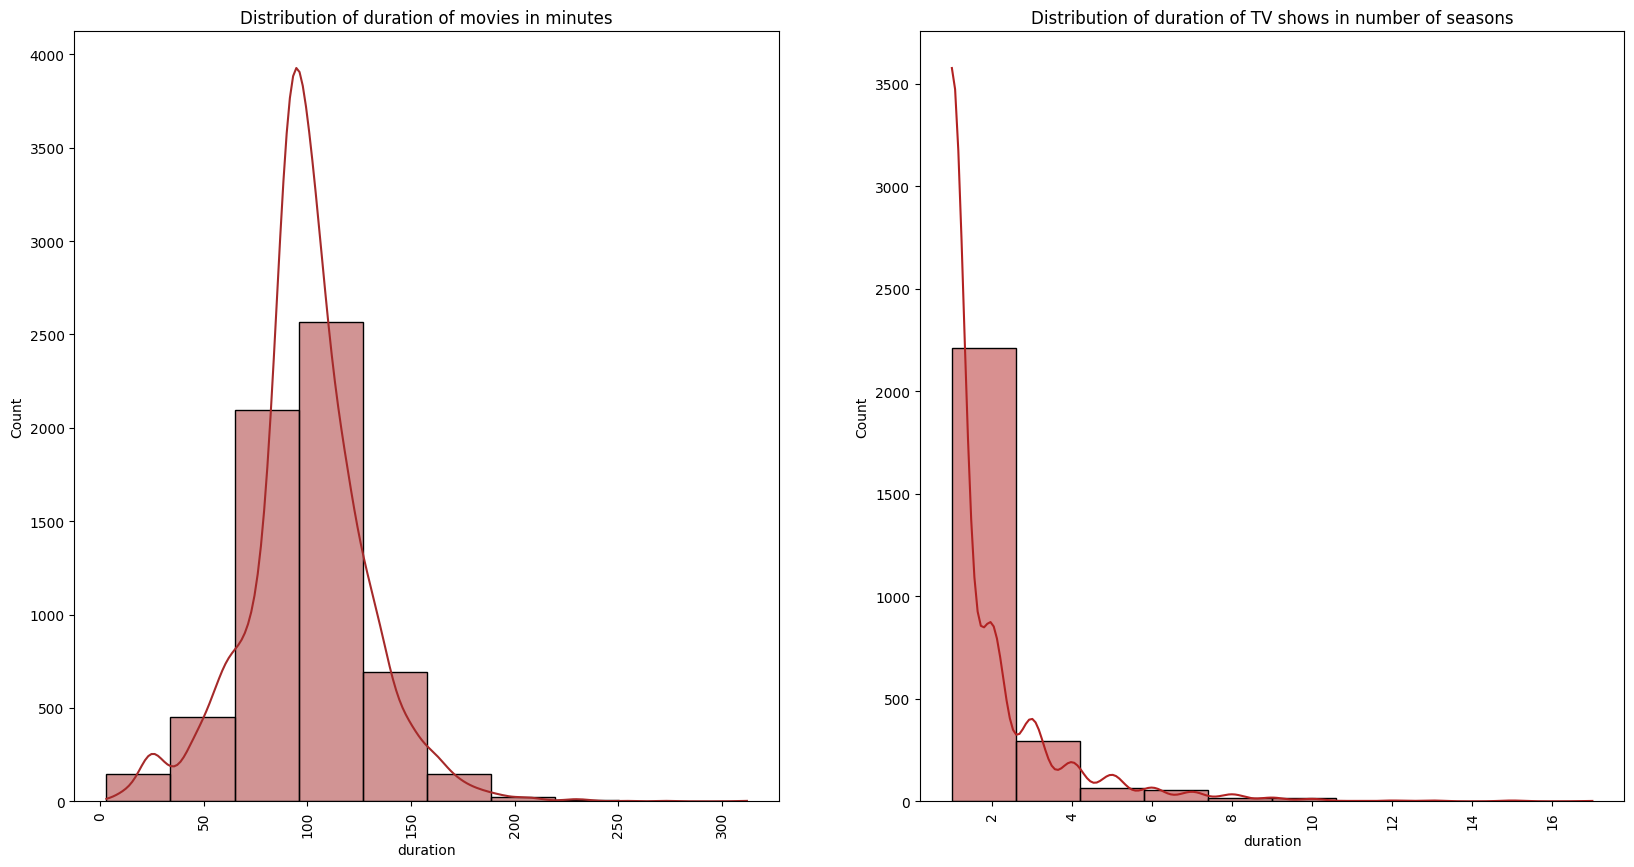

In [31]:
# Below graph shows distribution of movies and tv shows in terms of duration.
# Observation -> 
# For Movies, majority of it has duration of around 100 minutes. For Tv Shows, Majority of them have less than 2 seasons.
duration_movie = data[data['type']=='Movie']['duration']
duration_tv = data[data['type']=='TV Show']['duration']
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Distribution of duration of movies in minutes')
sns.histplot(data=duration_movie,bins=10,color='brown',kde=True)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Distribution of duration of TV shows in number of seasons')
sns.histplot(data=duration_tv,bins=10,color='firebrick',kde=True)
plt.xticks(rotation=90)
plt.savefig(fname='durationwise_content_dist_31.png')
plt.show()

In [32]:
# Statistical summary for data for movies
data[data['type']=='Movie'].describe()

,date_added,release_year,duration,year_added
count,6126,6126.000000,6126.000000,6126.000000
mean,2019-05-07 20:35:15.572967680,2013.120144,99.584884,2018.851126
min,2008-01-01 00:00:00,1942.000000,3.000000,2008.000000
25%,2018-04-01 12:00:00,2012.000000,87.000000,2018.000000
50%,2019-06-20 00:00:00,2016.000000,98.000000,2019.000000
75%,2020-07-24 00:00:00,2018.000000,114.000000,2020.000000
max,2021-09-25 00:00:00,2021.000000,312.000000,2021.000000
std,NaN,9.681723,28.283225,1.561173


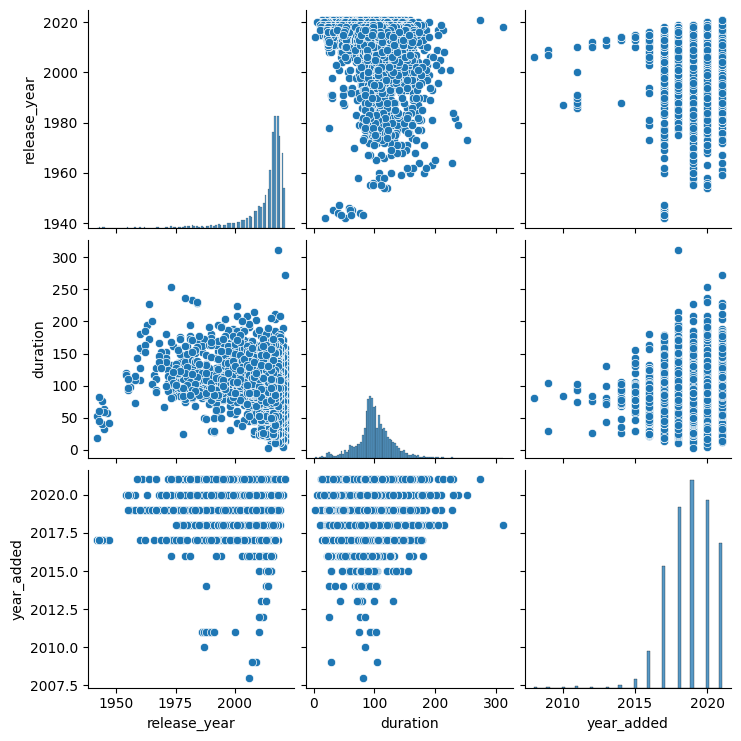

In [33]:
# Below pairplot shows correlation between release_year, duration & year_added for Movies.
# Observations
# 1. We can see that majority of content was added on the platform after 2015 irrespective of their release year.
# 2. Movies released around 1950's were of shorted duration but movies released later had wide range in terms of duration.
sns.pairplot(data=data[data['type']=='Movie'])
plt.savefig(fname='pairplot_correaltion_movie33.png')
plt.show()

In [34]:
## Statistical summary for data for TV Shows
data[data['type']=='TV Show'].describe()

,date_added,release_year,duration,year_added
count,2664,2664.000000,2664.000000,2664.000000
mean,2019-06-10 00:15:40.540540672,2016.627628,1.751877,2018.925300
min,2008-02-04 00:00:00,1925.000000,1.000000,2008.000000
25%,2018-04-27 00:00:00,2016.000000,1.000000,2018.000000
50%,2019-08-16 00:00:00,2018.000000,1.000000,2019.000000
75%,2020-10-01 00:00:00,2020.000000,2.000000,2020.000000
max,2021-09-24 00:00:00,2021.000000,17.000000,2021.000000
std,NaN,5.735194,1.550622,1.600804


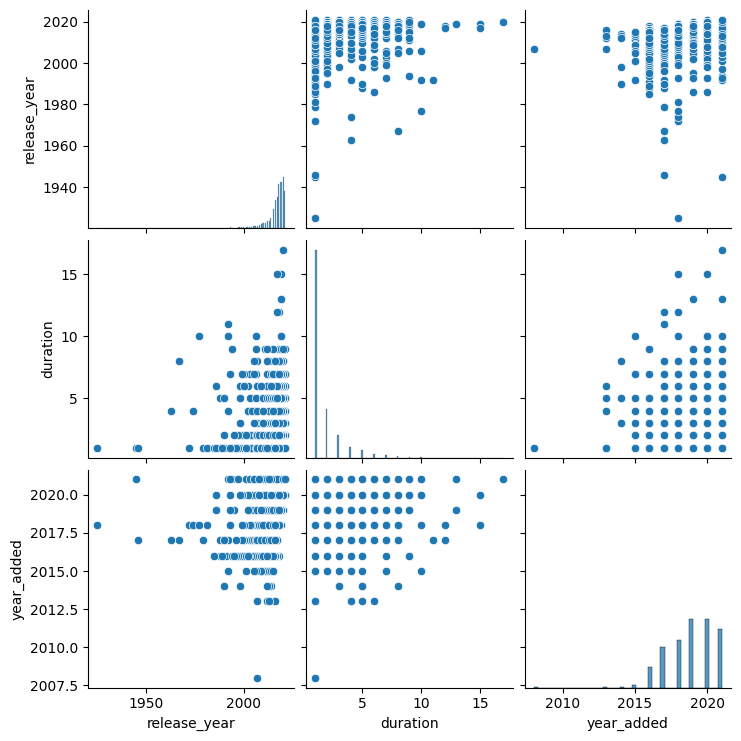

In [35]:
# Below pairplot shows correlation between release_year, duration & year_added for TV Shows.
# Observations
# 1. We can see that majority of content was added on the platform after 2015 irrespective of their release year.
# 2. Very few TV shows were released before 1980.
# 3. Majority of TV shows had less than 5 seasons.
sns.pairplot(data=data[data['type']=='TV Show'])
plt.savefig(fname='pairplot_correaltion_tvshow35.png')
plt.show()

In [36]:
# Count of different types of shows present on platform.
# Observation -> Content on platform are either Movie or TV show.
show_type = data['type'].value_counts()
show_type

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

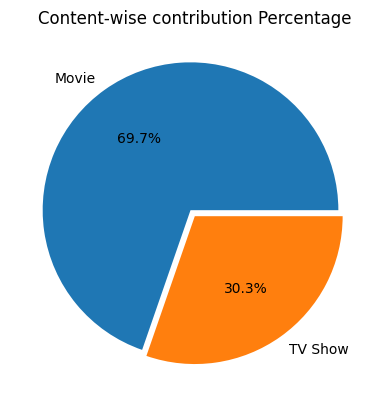

In [37]:
# Below pie chart shows the contentwise percentage. 
# Observations ->
# Movies contribute to 69.7% of the content on platform and 30.3% are TV shows.
plt.pie(show_type,labels=show_type.index,autopct='%1.1f%%',explode=[0.05,0])
plt.title('Content-wise contribution Percentage')
plt.savefig(fname='piechart_content-wise37.png')
plt.show()

In [38]:
# Count of contents rating wise
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [39]:
# Ratings available for each content type and count for each rating.
data.groupby('type')['rating'].value_counts()

type     rating  
Movie    TV-MA       2062
         TV-14       1427
         R            797
         TV-PG        540
         PG-13        490
         PG           287
         TV-Y7        139
         TV-Y         131
         TV-G         126
         NR            75
         G             41
         TV-Y7-FV       5
         NC-17          3
         UR             3
TV Show  TV-MA       1143
         TV-14        730
         TV-PG        321
         TV-Y7        194
         TV-Y         175
         TV-G          94
         NR             4
         R              2
         TV-Y7-FV       1
Name: count, dtype: int64

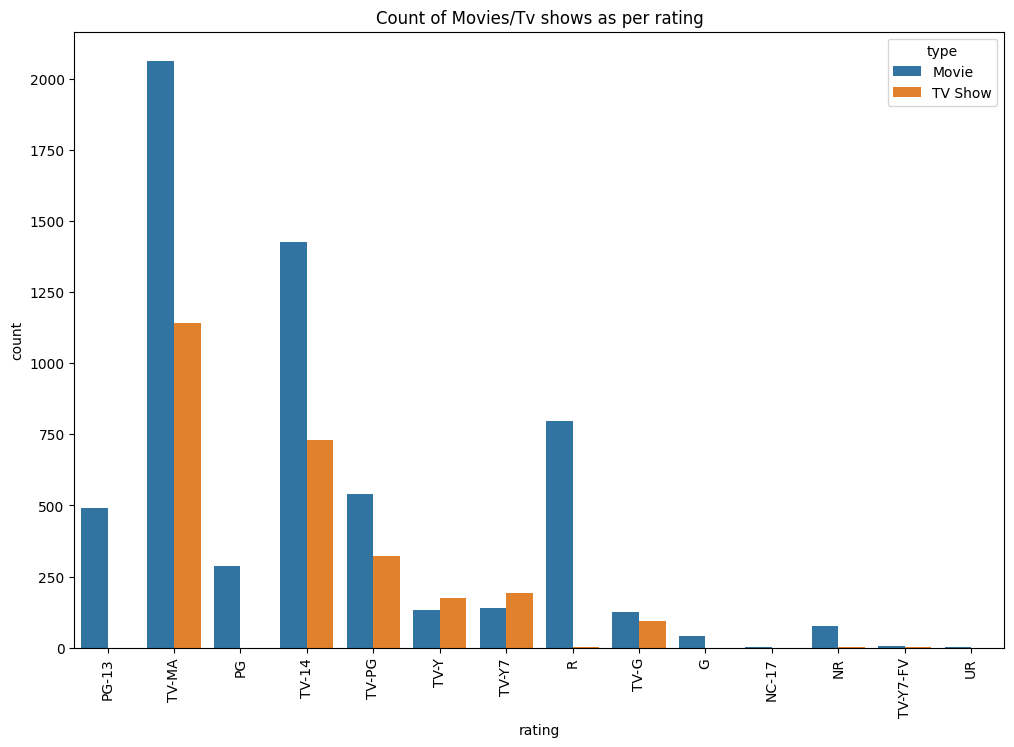

In [40]:
# Below count plot shows distribution of each content type according to rating.
# Observations
# 1. TV-MA, TV-14, R, PG-13 & TV-PG are the topmost rated category in terms of number of movies available.
# 2. TV-MA, TV-14, TV-PG, TV-Y7 & TV-Y are topmost rated category in terms of number of TV-shows available.
plt.figure(figsize=(12,8))
sns.countplot(data=data,x='rating',hue='type')
plt.xticks(rotation=90)
plt.title('Count of Movies/Tv shows as per rating')
plt.savefig(fname='Countplot_ratingwise_dist40.png')
plt.show()

In [41]:
data['release_year'].value_counts()

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [42]:
data.groupby('type')['release_year'].value_counts()

type     release_year
Movie    2018            767
         2017            765
         2016            658
         2019            633
         2020            517
                        ... 
TV Show  1979              1
         1981              1
         1985              1
         1989              1
         1991              1
Name: count, Length: 119, dtype: int64

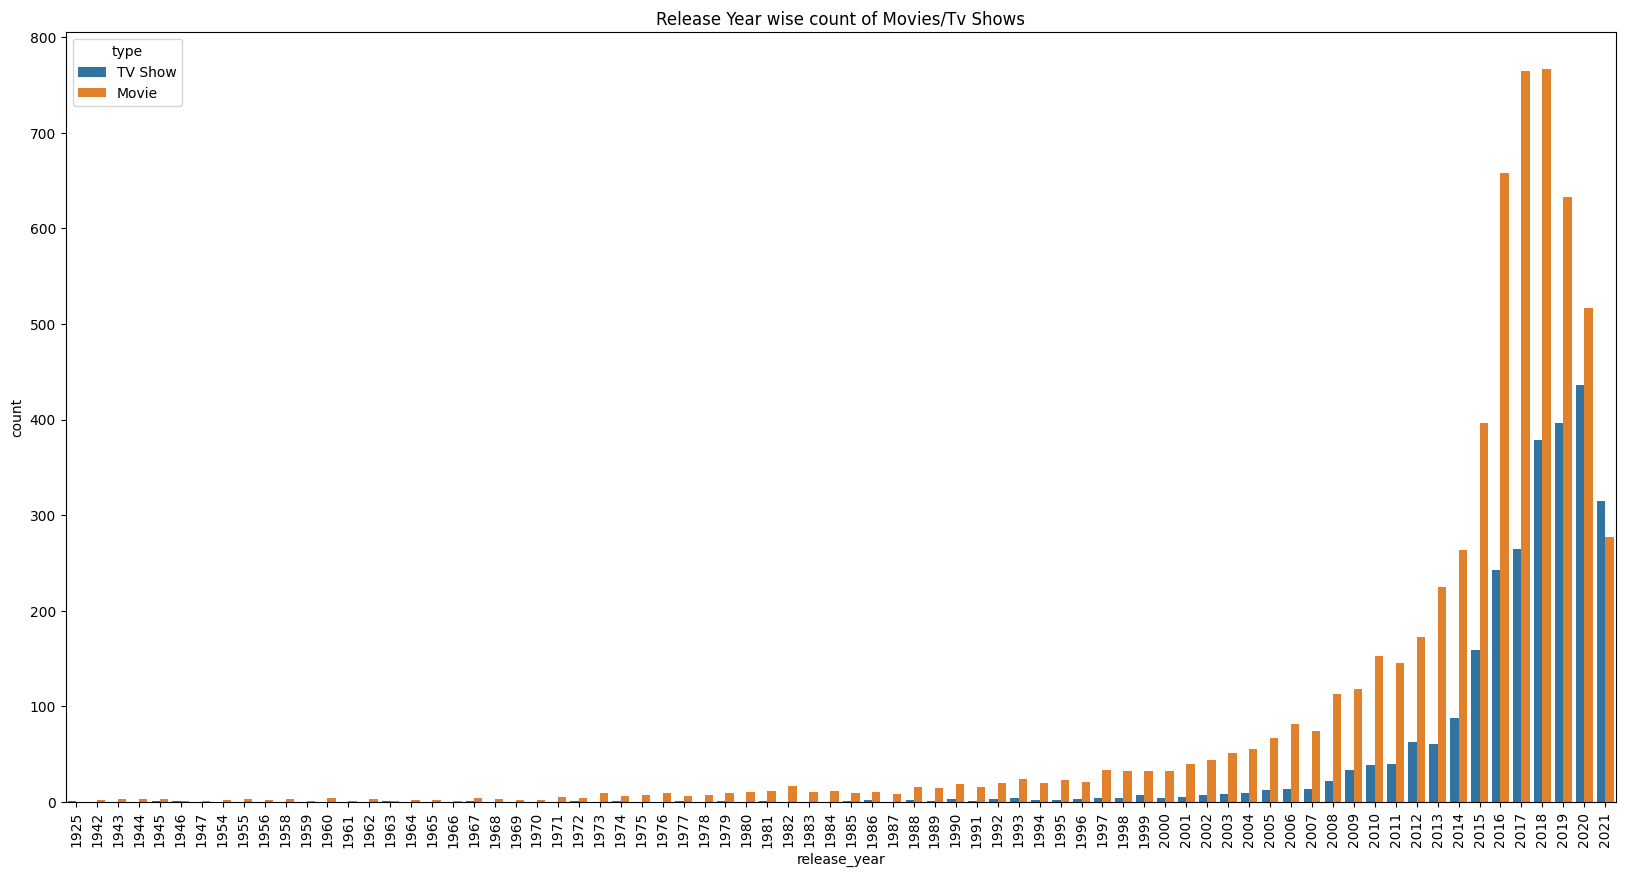

In [43]:
# Below graph shows the distribution of content release year wise.
# Observations ->
# 1. Majority of the content was released in last 5 years.
# 2. There are more number of movies released compared to TV shows for every year except in 2021.
plt.figure(figsize=(20,10))
sns.countplot(data,x='release_year',hue='type')
plt.title('Release Year wise count of Movies/Tv Shows')
plt.xticks(rotation=90)
plt.savefig(fname='countplot_releaseyear_wise_43.png')
plt.show()

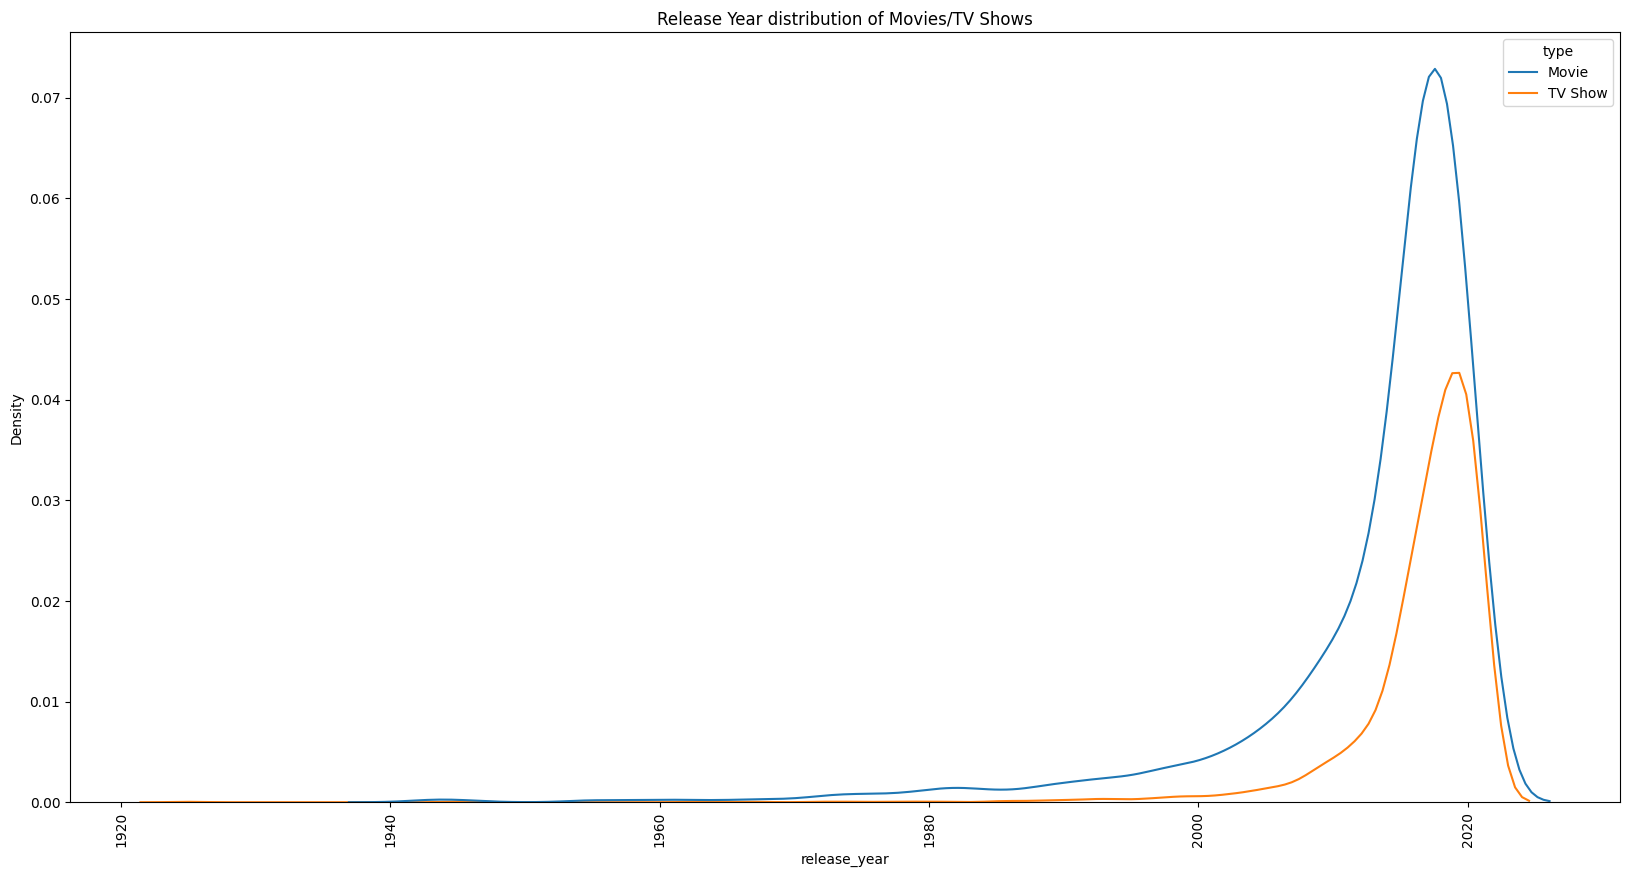

In [44]:
# Below KDE plot shows distribution of content released along the years.
# Observations ->
# 1. Rise in number of movies released started from 1980 and it continued to grow significantly till around 2020 and declined later might be due to Covid.
# 2. Rise in number of TV Shows released started from 2000 and it continued to grow significantly till 2020 and declined later might be due to Covid.
plt.figure(figsize=(20,10))
sns.kdeplot(data,x='release_year',hue='type')
plt.title('Release Year distribution of Movies/TV Shows')
plt.xticks(rotation=90)
plt.savefig(fname='kdeplot_releaseyear_wise_44.png')
plt.show()

In [45]:
# Year of addition of different types of content on the platform along with their count.
data.groupby('type')['year_added'].value_counts()

type     year_added
Movie    2019          1424
         2020          1284
         2018          1237
         2021           993
         2017           836
         2016           251
         2015            56
         2014            19
         2011            13
         2013             6
         2012             3
         2009             2
         2008             1
         2010             1
TV Show  2020           595
         2019           592
         2021           505
         2018           411
         2017           349
         2016           175
         2015            26
         2013             5
         2014             5
         2008             1
Name: count, dtype: int64

<Figure size 2000x1000 with 0 Axes>

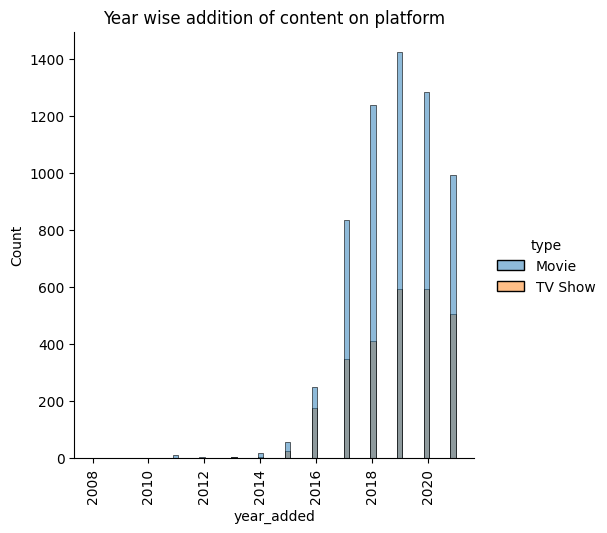

In [46]:
# Below displot shows yearwise addition of content on the platform.
# Observation -> 
# We can see that in last 5 years there is a significant rise in the addition of content on the platform.
plt.figure(figsize=(20,10))
sns.displot(data=data,x='year_added',hue='type')
plt.title('Year wise addition of content on platform')
plt.xticks(rotation=90)
plt.savefig(fname='displot_yearwise_addition_46.png')
plt.show()

In [47]:
# Month of addition of different types of content on the platform along with their count.
data.groupby('type')['month_added'].value_counts()

type     month_added
Movie    July           565
         April          549
         December       547
         January        545
         October        545
         March          528
         August         518
         September      518
         November       498
         June           492
         May            439
         February       382
TV Show  December       265
         July           262
         September      251
         August         236
         June           236
         October        215
         April          214
         March          213
         November       207
         May            193
         January        192
         February       180
Name: count, dtype: int64

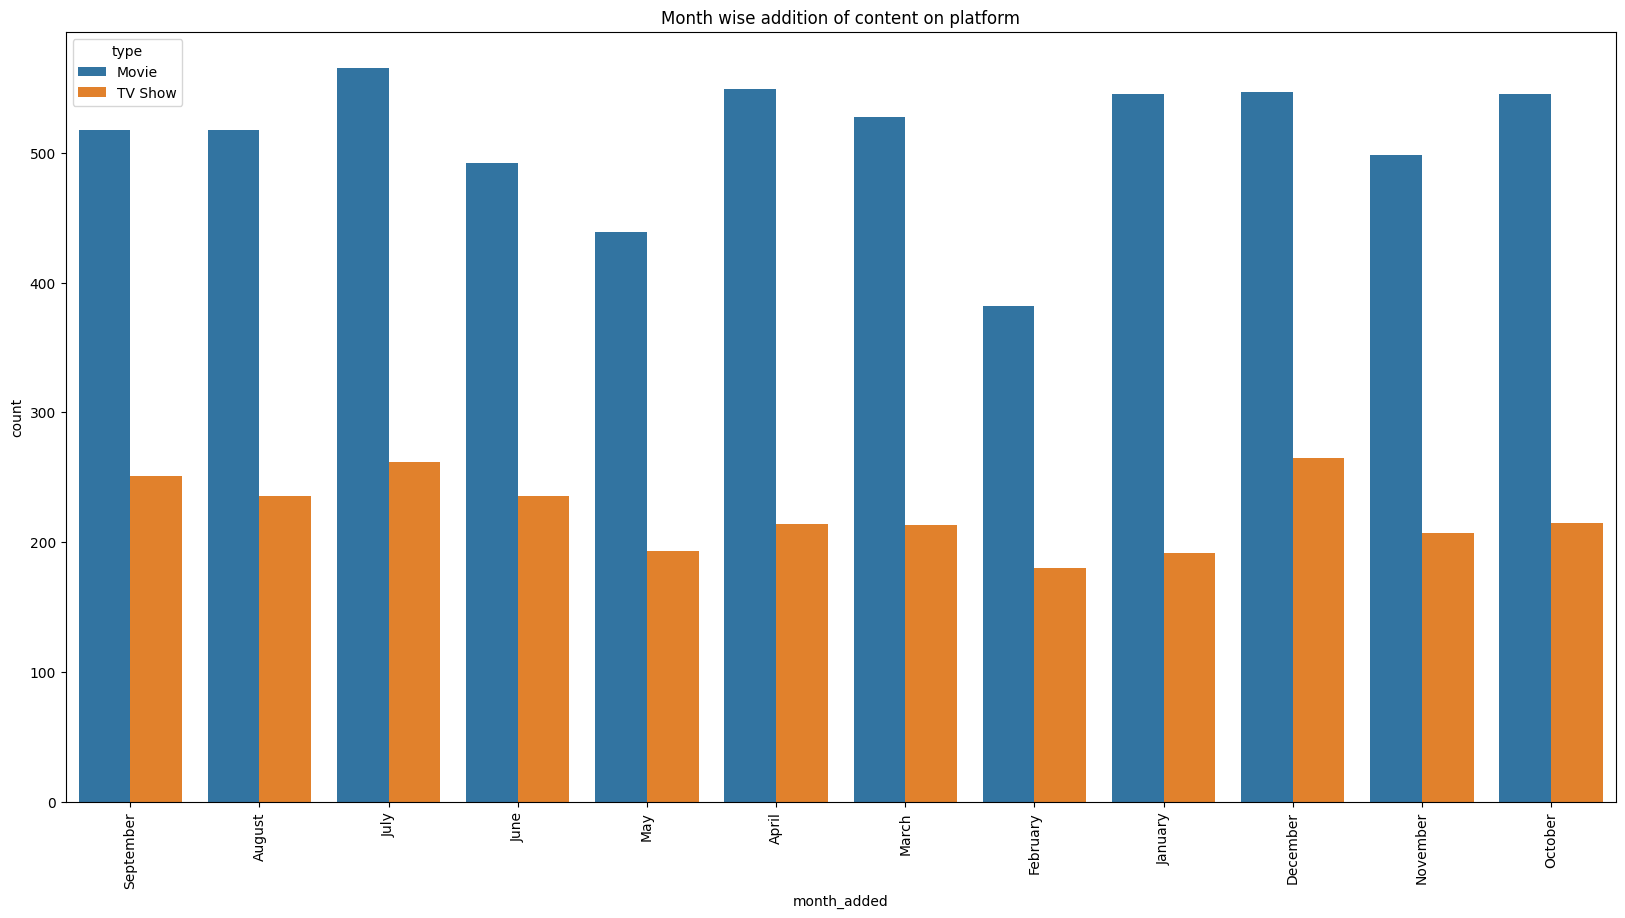

In [48]:
# Below countplot shows monthwise addition of content on the platform.
# Observations ->
# 1. There is no significant difference between months in terms of addition of content.
# 2. July is the month when most number of contents are added and february is when lowest number of contents are added.
# 3. TV Shows added each month is always less compared to Movies.
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='month_added',hue='type')
plt.title('Month wise addition of content on platform')
plt.savefig(fname='countplot_monthwise_addition_48.png')
plt.xticks(rotation=90)
plt.show()

In [49]:
# Day of addition of different types of content on the platform along with their count.
data.groupby('type')['day_added'].value_counts()

type     day_added
Movie    Friday       1565
         Thursday     1052
         Wednesday     905
         Tuesday       851
         Monday        627
         Sunday        569
         Saturday      557
TV Show  Friday        932
         Wednesday     382
         Tuesday       345
         Thursday      341
         Saturday      259
         Monday        223
         Sunday        182
Name: count, dtype: int64

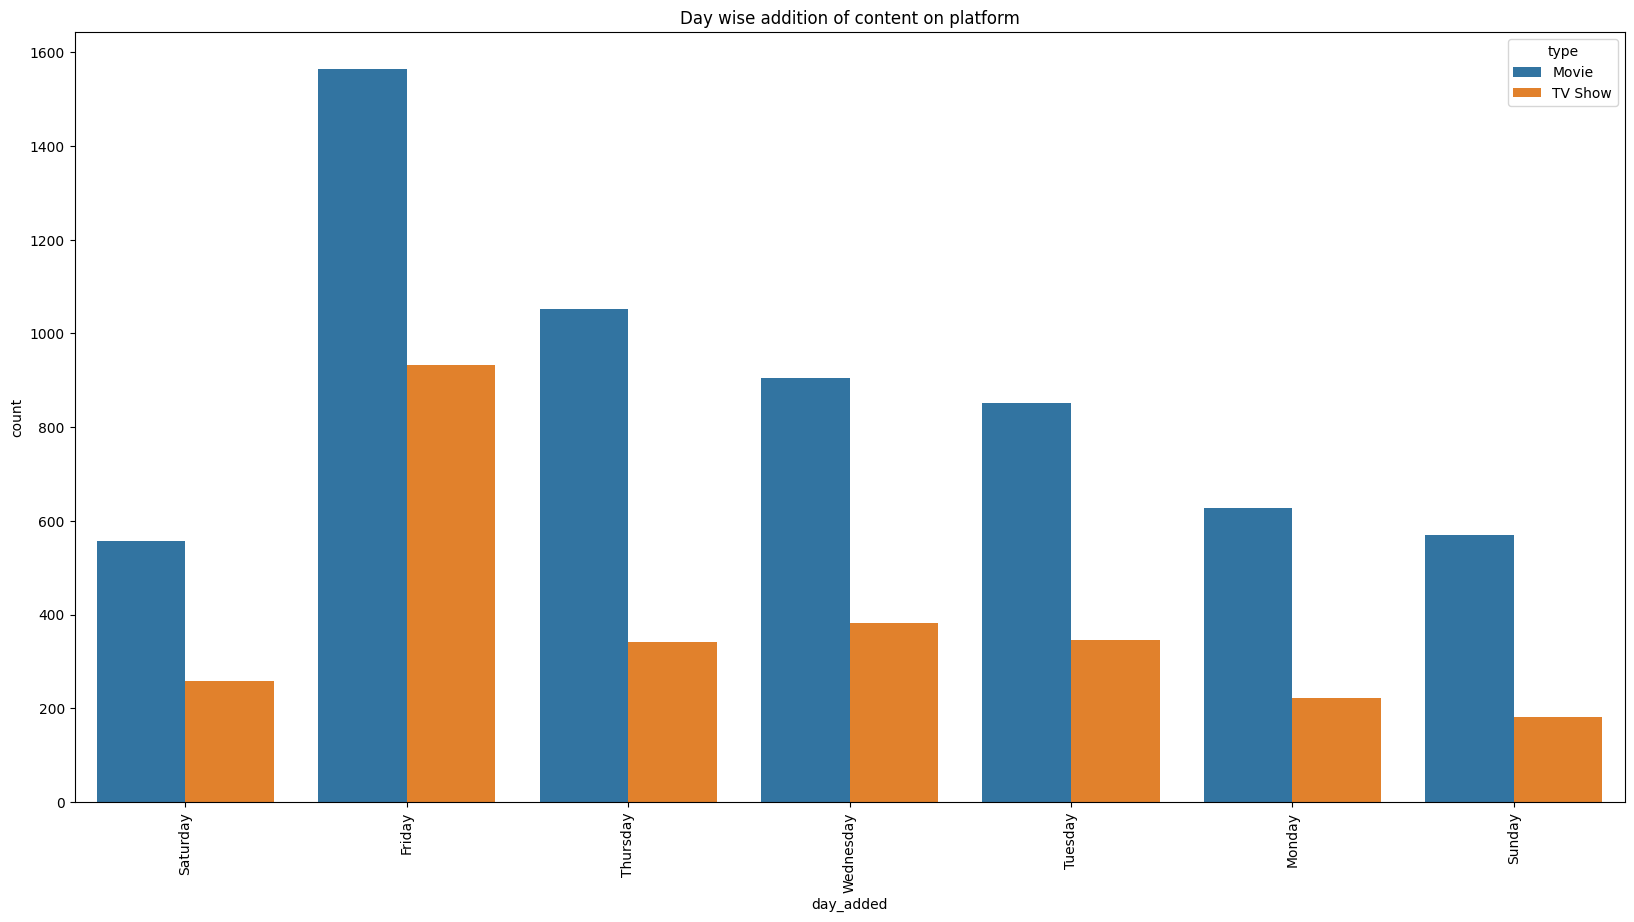

In [50]:
# Below countplot shows daywise addition of content on the platform.
# Observation -> 
# We can see that Friday is the most preferred day for content addition on platform and weekend is least preferred.
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='day_added',hue='type',order = data['day_added'])
plt.title('Day wise addition of content on platform')
plt.savefig(fname='countplot_daywise_addition_50.png')
plt.xticks(rotation=90)
plt.show()

In [51]:
# Oldest released movies on the platform.
movies_df = data[data['type'] == 'Movie']
oldest_movie = movies_df[movies_df['release_year'] == movies_df['release_year'].min()]
oldest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown Cast,United States,2017-03-31,1942,TV-14,52,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,Friday,March,2017
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,Friday,March,2017


In [52]:
# More than 200 recently released are available on the platform.
recent_movie = movies_df[movies_df['release_year'] == movies_df['release_year'].max()]
recent_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown Country,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Friday,September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Friday,September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,Thursday,September,2021
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",Unknown Country,2021-09-22,2021,TV-PG,91,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,Wednesday,September,2021
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",Unknown Country,2021-09-22,2021,TV-14,94,Thrillers,After a deadly home invasion at a couple’s new...,Wednesday,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,s1426,Movie,Creating The Queen's Gambit,Unknown Director,Unknown Cast,United States,2021-01-08,2021,TV-14,14,Documentaries,A fascinating character. Exquisite sets. A wig...,Friday,January,2021
1431,s1432,Movie,Stuck Apart,Unknown Director,"Engin Günaydın, Haluk Bilginer, Binnur Kaya, Ö...",Turkey,2021-01-08,2021,TV-MA,97,"Comedies, Dramas, International Movies","Entrenched in a midlife crisis, Aziz seeks sol...",Friday,January,2021
1436,s1437,Movie,Ratones Paranoicos: The Band that Rocked Argen...,"Alejandro Ruax, Ramiro Martínez","Juan Sebastián Gutiérrez, Pablo Cano, Pablo Me...",Unknown Country,2021-01-06,2021,TV-MA,76,"Documentaries, International Movies, Music & M...","The irrepressible Ratones Paranoicos, Argentin...",Wednesday,January,2021
1466,s1467,Movie,The Minimalists: Less Is Now,Unknown Director,Unknown Cast,United States,2021-01-01,2021,TV-14,54,Documentaries,They've built a movement out of minimalism. Lo...,Friday,January,2021


In [53]:
# Oldest released TV Show on the platform.
tv_df = data[data['type'] == 'TV Show']
oldest_show = tv_df[tv_df['release_year'] == tv_df['release_year'].min()]
oldest_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Unknown Director,Unknown Cast,Unknown Country,2018-12-30,1925,TV-14,1,TV Shows,This collection restores films from women who ...,Sunday,December,2018


In [54]:
# More than 10% of TV shows available on the platform was added in a single year (2021).
tv_df = data[data['type'] == 'TV Show']
recent_show = tv_df[tv_df['release_year'] == tv_df['release_year'].max()]
recent_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,September,2021
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,September,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown Country,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Friday,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,s1461,TV Show,Monarca,Unknown Director,"Irene Azuela, Juan Manuel Bernal, Osvaldo Bena...",Mexico,2021-01-01,2021,TV-MA,2,"International TV Shows, Spanish-Language TV Sh...","After 20 years, Ana María returns to Mexico an...",Friday,January,2021
1551,s1552,TV Show,Hilda,Unknown Director,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States",2020-12-14,2021,TV-Y7,2,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",Monday,December,2020
1696,s1697,TV Show,Polly Pocket,Unknown Director,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland",2020-11-15,2021,TV-Y,2,Kids' TV,After uncovering a magical locket that allows ...,Sunday,November,2020
2920,s2921,TV Show,Love Is Blind,Unknown Director,"Nick Lachey, Vanessa Lachey",United States,2020-02-13,2021,TV-MA,1,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...,Thursday,February,2020


In [55]:
# Splitting and stack the columns containing multiple values.
tt = data[['title']].reset_index()
ct = data['cast'].str.split(', ',expand=True).stack().reset_index()[['level_0',0]].rename(columns={0:'cast'})
cast = pd.merge(tt,ct,how='left',left_on='index',right_on='level_0').drop(columns=['index','level_0'])
dd = data['director'].str.split(', ',expand=True).stack().reset_index()[['level_0',0]].rename({0:'director'},axis=1)
director = pd.merge(tt,dd,how='left',left_on='index',right_on='level_0').drop(['index','level_0'],axis=1)
cn = data['country'].str.split(', ',expand=True).stack().reset_index()[['level_0',0]].rename({0:'country'},axis=1)
country = pd.merge(tt,cn,how='left',left_on='index',right_on='level_0').drop(['index','level_0'],axis=1)
li = data['listed_in'].str.split(', ',expand=True).stack().reset_index()[['level_0',0]].rename(columns={0:'listed_in'})
listed_in = pd.merge(tt,li,left_on='index',right_on='level_0').drop(['index','level_0'],axis=1)
merge1 = pd.merge(cast,director,on='title')
merge2 = pd.merge(merge1,country,on='title')
merge3 = pd.merge(merge2,listed_in,on='title')
final = pd.merge(merge3,data,on='title',suffixes=('','_y')).drop(columns=['director_y','cast_y','country_y','listed_in_y'])
final.head()

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,day_added,month_added,year_added
0,Dick Johnson Is Dead,Unknown Cast,Kirsten Johnson,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",Saturday,September,2021
1,Blood & Water,Ama Qamata,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Friday,September,2021
2,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Friday,September,2021
3,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Friday,September,2021
4,Blood & Water,Khosi Ngema,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Friday,September,2021


In [56]:
# Checking duplicates if any after expanding columns.
final.duplicated().value_counts()

False    201708
True         55
Name: count, dtype: int64

In [57]:
# Drop duplicates
final.drop_duplicates(inplace=True)

In [58]:
final.duplicated().value_counts()

False    201708
Name: count, dtype: int64

In [59]:
# Number of directors whose contents are available on the platform.
final[final['director']!= 'Unknown Director']['director'].nunique()

4991

In [60]:
# Number of actors whose contents are available on the platform.
final[final['cast']!= 'Unknown Cast']['cast'].nunique()

36392

In [61]:
# Number of countries in which the content is available.
final[final['country']!= 'Unknown Country']['country'].nunique()

127

In [62]:
# Number of Genre in which content is available.
final['listed_in'].nunique()

42

In [63]:
# Number of different rating category in which content is available.
final['rating'].nunique()

14

In [64]:
# Number of countries in which movies are available
final[final['type']=='Movie']['country'].nunique()

123

In [65]:
# Number of countries in which TV shows are available
final[final['type']=='TV Show']['country'].nunique()

67

In [66]:
final.isna().sum()

title           0
cast            0
director        0
country         0
listed_in       0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
dtype: int64

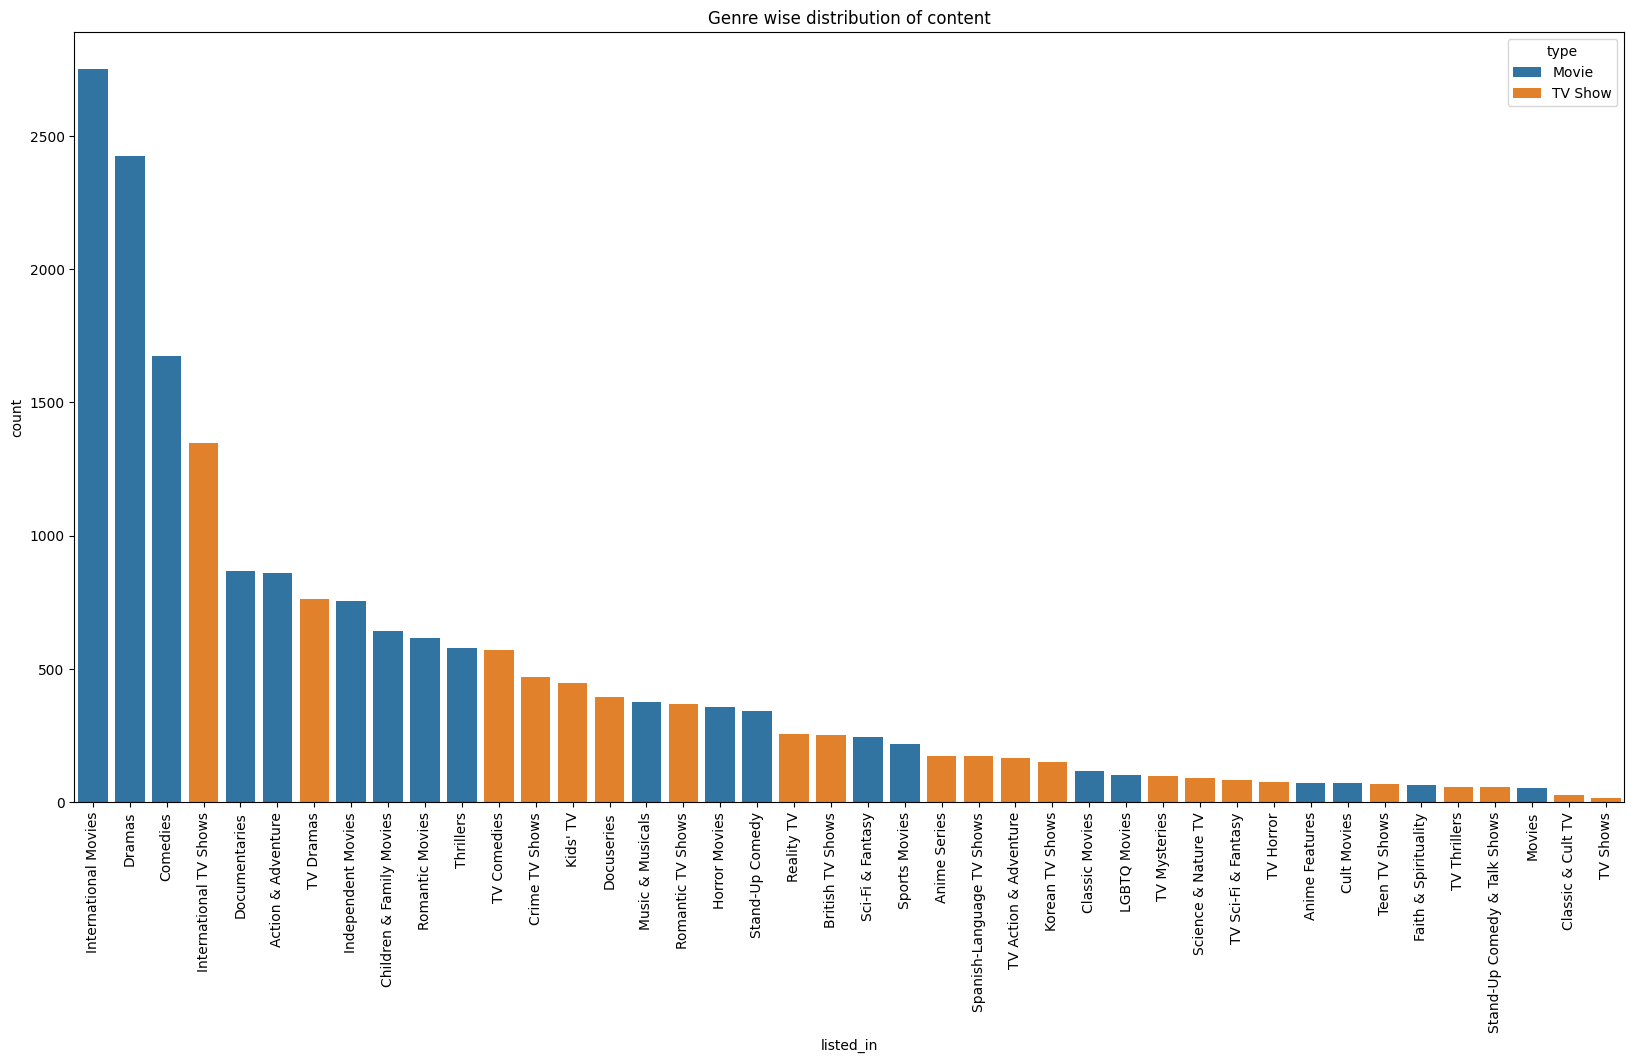

In [67]:
# Below graph shows the distribution of content Genre wise.
# Observations ->
# 1. We can see International Movies and International TV Shows are the leading Genre for Movies and Tv Show respectively.
# 2. Movies and TV shows genres have lowest number of movies and tv shows respectively.
listed_in = final[['title','listed_in','type']].drop_duplicates(keep='first')[['listed_in','type']].value_counts(ascending=False).reset_index()
plt.figure(figsize=(20,10))
plt.title('Genre wise distribution of content')
sns.barplot(data = listed_in,x='listed_in',y='count',hue='type')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_genre_dist_67.png')
plt.show()

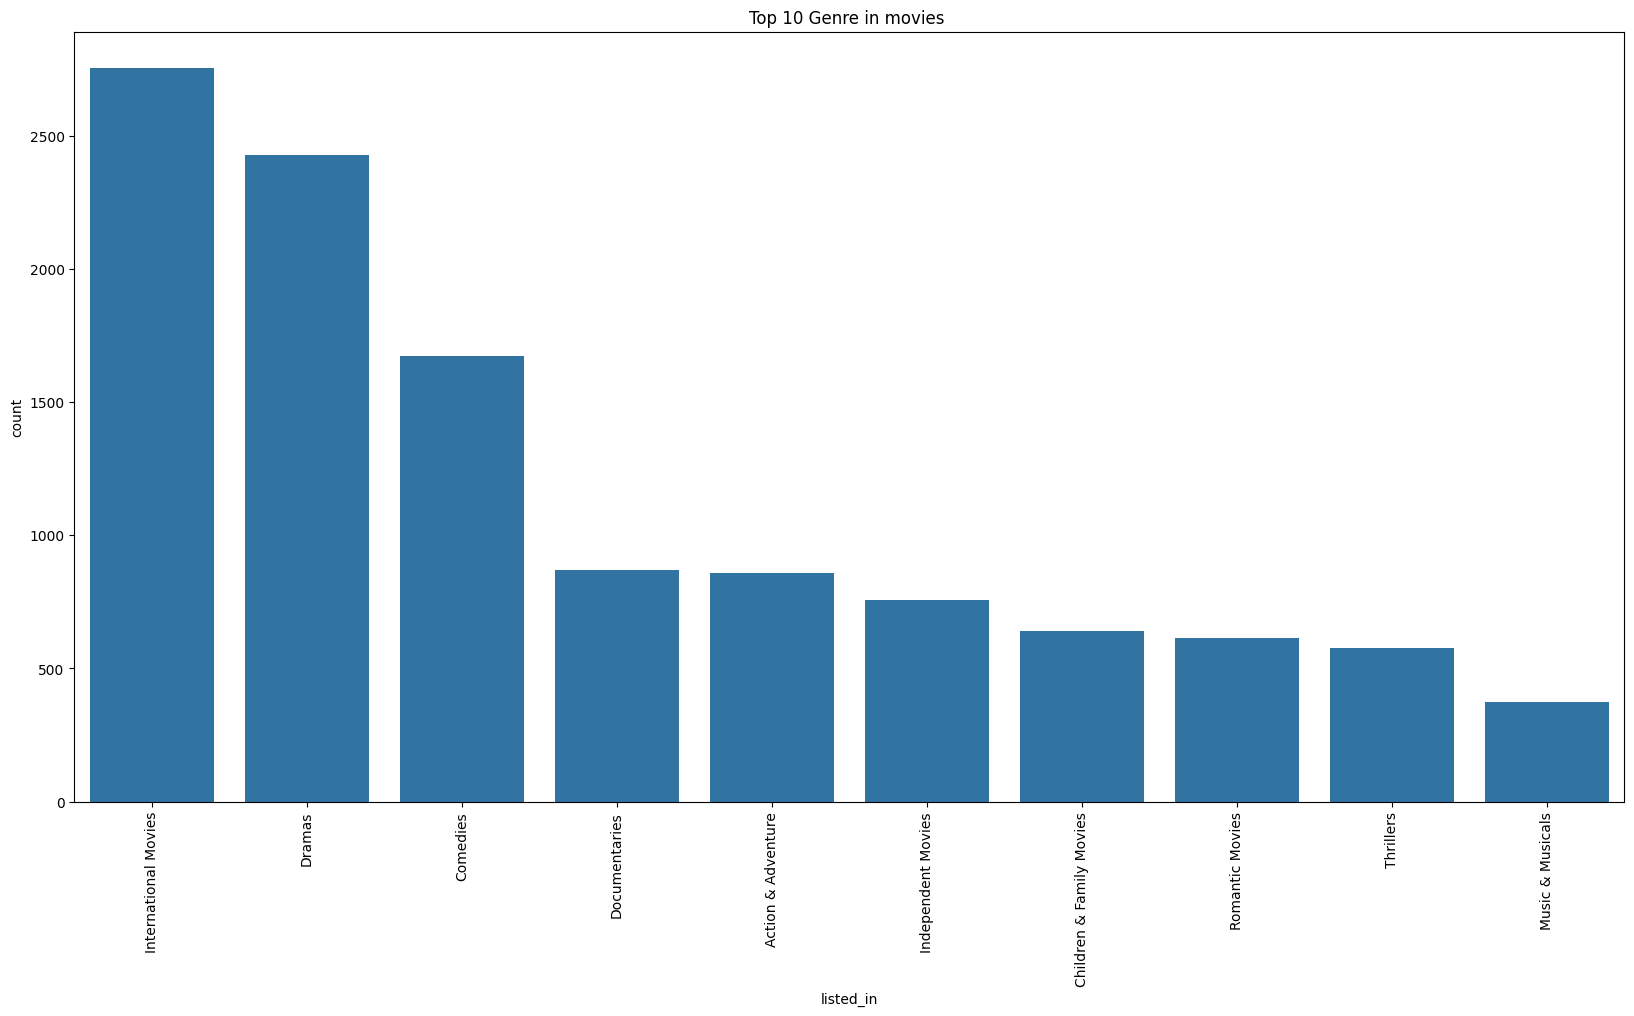

In [68]:
# Below graph shows Top 10 Genre for movies.
# Observation ->
# International Movies genre has the highest number of movies.
listed_in_movies = final[final['type']=='Movie'][['title','listed_in']].drop_duplicates(keep='first')[['listed_in']].value_counts(ascending=False).reset_index()[0:10]
plt.figure(figsize=(20,10))
plt.title('Top 10 Genre in movies ')
sns.barplot(data = listed_in_movies,x='listed_in',y='count')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_10_genre_movie_68.png')
plt.show()

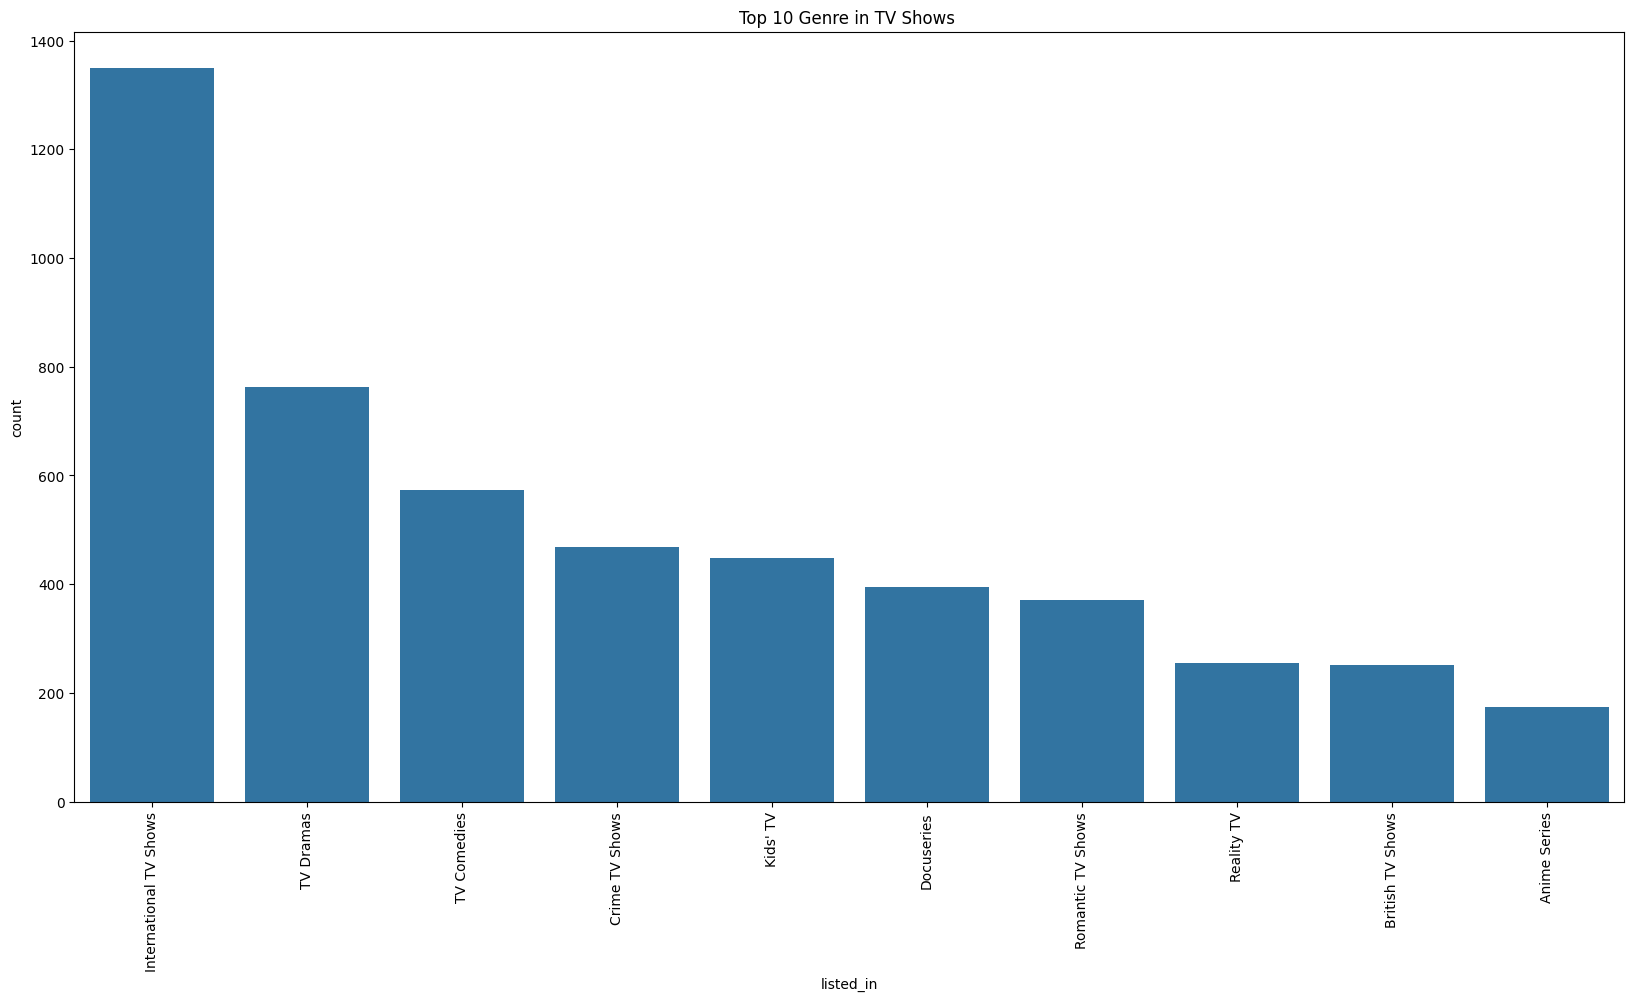

In [69]:
# Below graph shows Top 10 Genre for TV Shows.
# Observations ->
# International TV shows is the genre with most number of TV shows.
listed_in_tv = final[final['type']=='TV Show'][['title','listed_in']].drop_duplicates(keep='first')[['listed_in']].value_counts(ascending=False).reset_index()[0:10]
plt.figure(figsize=(20,10))
plt.title('Top 10 Genre in TV Shows ')
sns.barplot(data = listed_in_tv,x='listed_in',y='count')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_10_genre_tv_69.png')
plt.show()

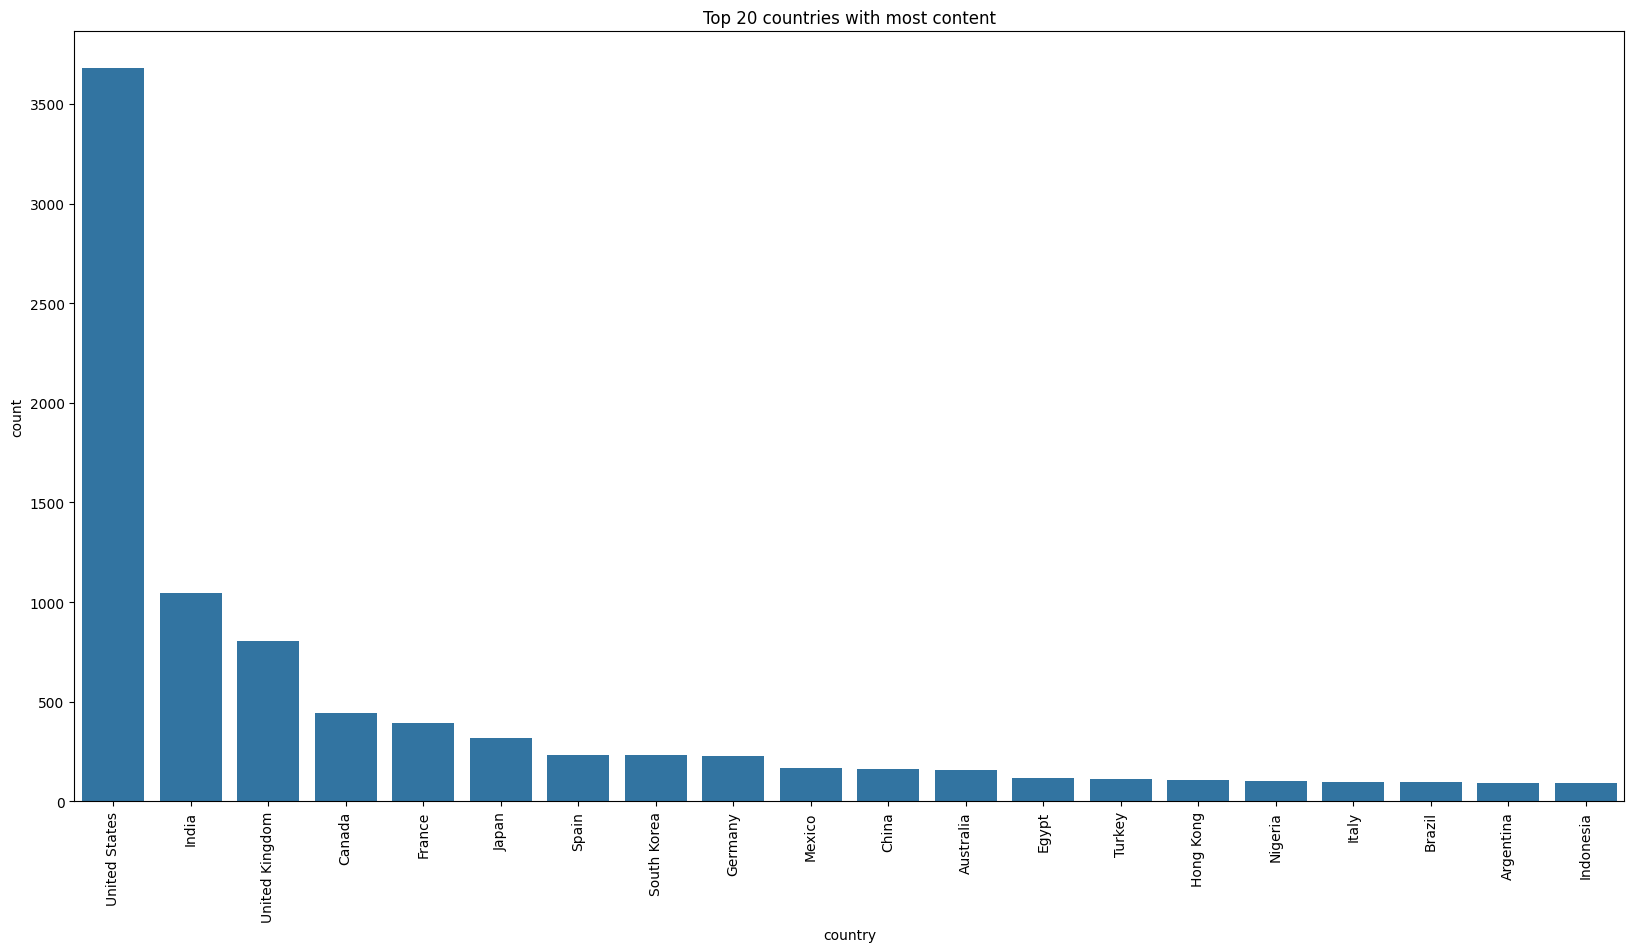

In [70]:
# Below graph shows the Top 20 countries with most content available on the platform.
# Observation ->
# USA has the most number of content available on the platform.
top_20_country = final[final['country']!='Unknown Country'][['title','country']].drop_duplicates(keep='first')[['country']].value_counts(ascending=False).reset_index()[0:20]
plt.figure(figsize=(20,10))
sns.barplot(data = top_20_country,x='country',y='count')
plt.title('Top 20 countries with most content')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_20_country_70.png')
plt.show()

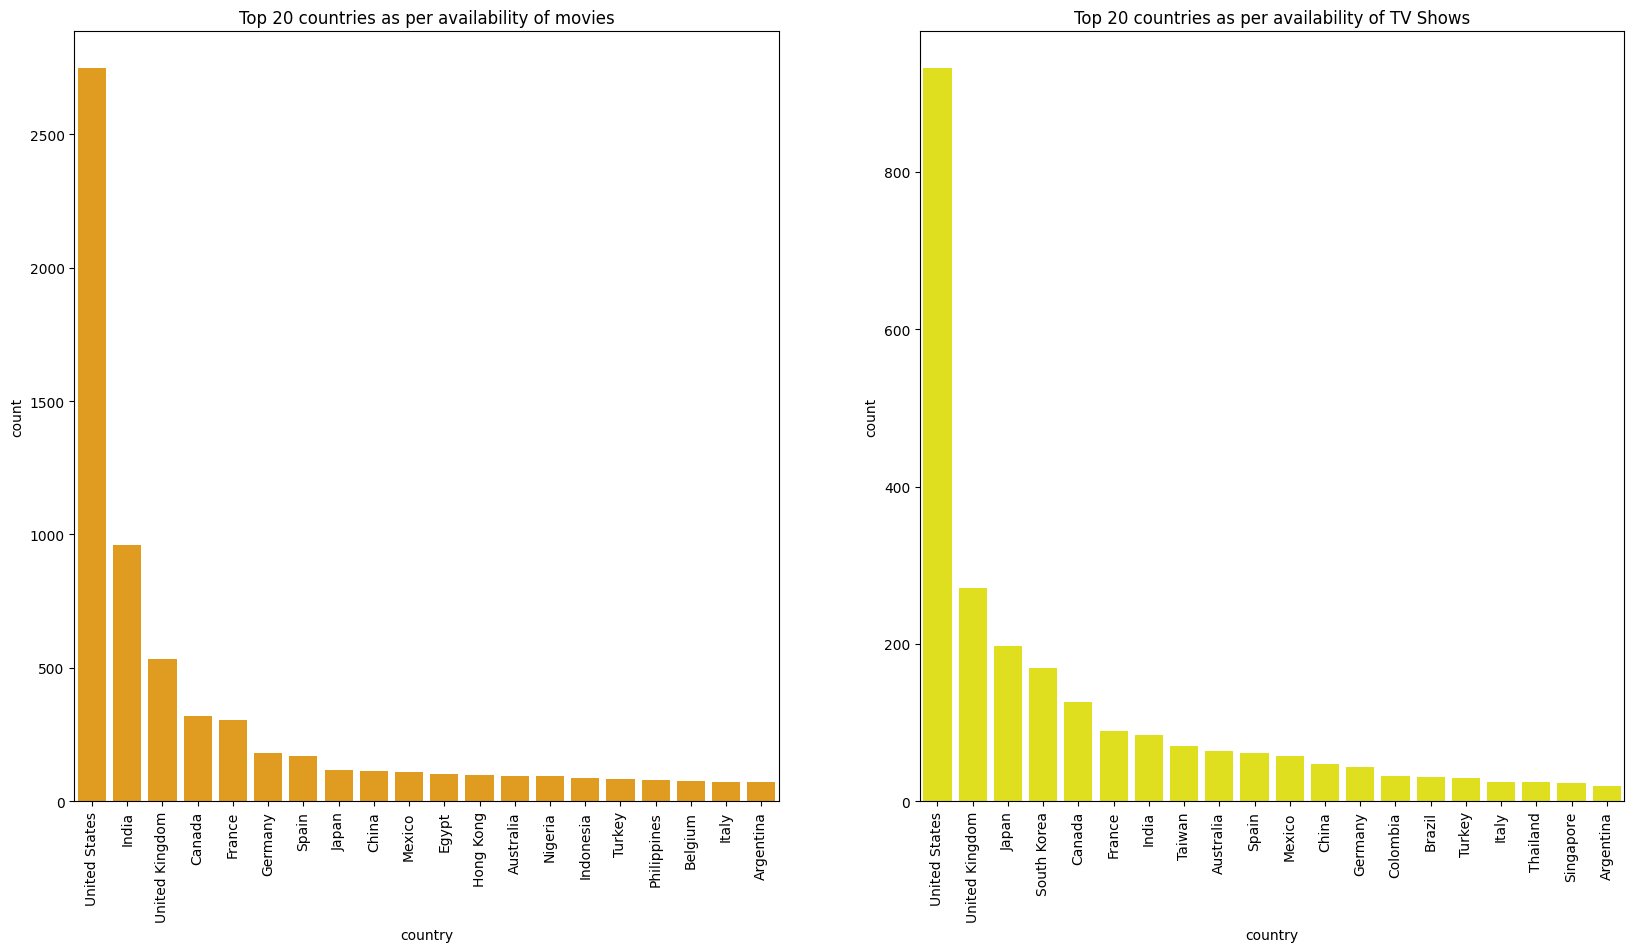

In [71]:
# Below group of plots shows the Top 20 countries where most Movies and TV shows are present.
# Observation ->
# We can see that US is leading both in terms of number of movies and TV shows on the platform.
top_20_country = final[['title','country','type']].drop_duplicates(keep='first')[['country','type']].value_counts(ascending=False).reset_index()
top_20_country_movie = top_20_country[(top_20_country['type']=='Movie') & (top_20_country['country']!='Unknown Country')][0:20]
top_20_country_tv = top_20_country[(top_20_country['type']=='TV Show') & (top_20_country['country']!='Unknown Country')][0:20]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Top 20 countries as per availability of movies')
sns.barplot(data = top_20_country_movie,x='country',y='count',color='orange')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Top 20 countries as per availability of TV Shows')
sns.barplot(data = top_20_country_tv,x='country',y='count',color='yellow')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_20_country_content_71.png')
plt.show()

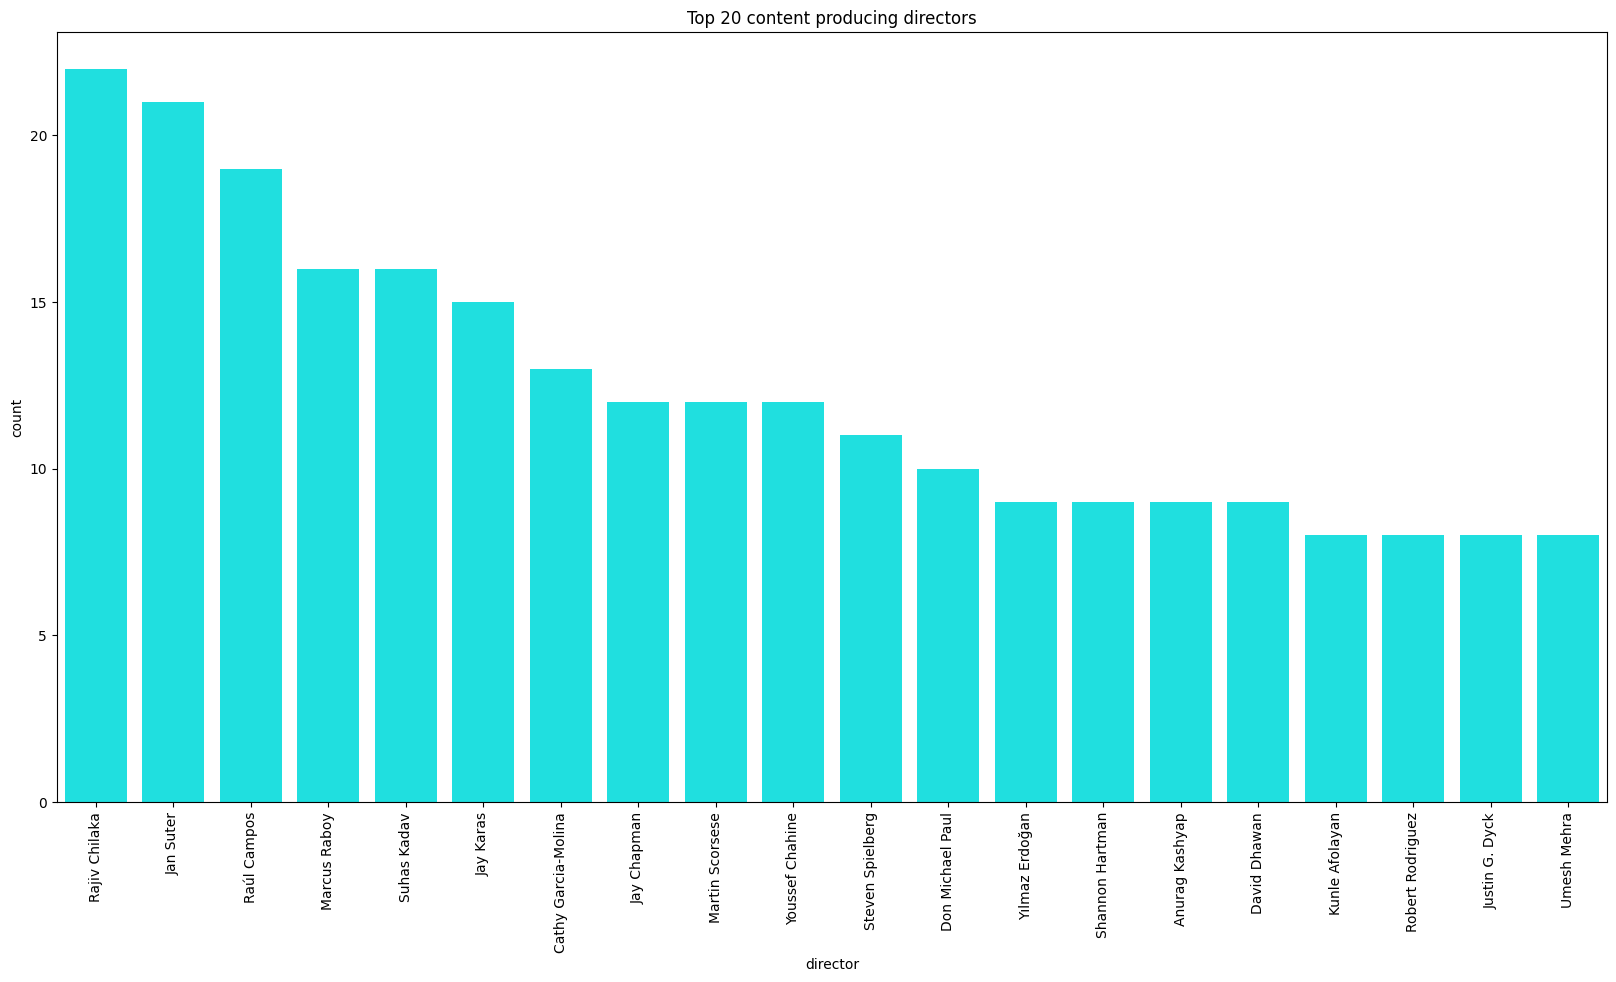

In [72]:
# Below graph show the Top 20 content producing directors.
# Onservation ->
# Rajiv Chilaka has directed the most number of content by a single director.
top_20_director = final[final['director']!='Unknown Director'][['title','director']].drop_duplicates(keep='first')[['director']].value_counts(ascending=False).reset_index()[0:20]
plt.figure(figsize=(20,10))
sns.barplot(data = top_20_director,x='director',y='count',color='cyan')
plt.title('Top 20 content producing directors')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_20_directors_72.png')
plt.show()

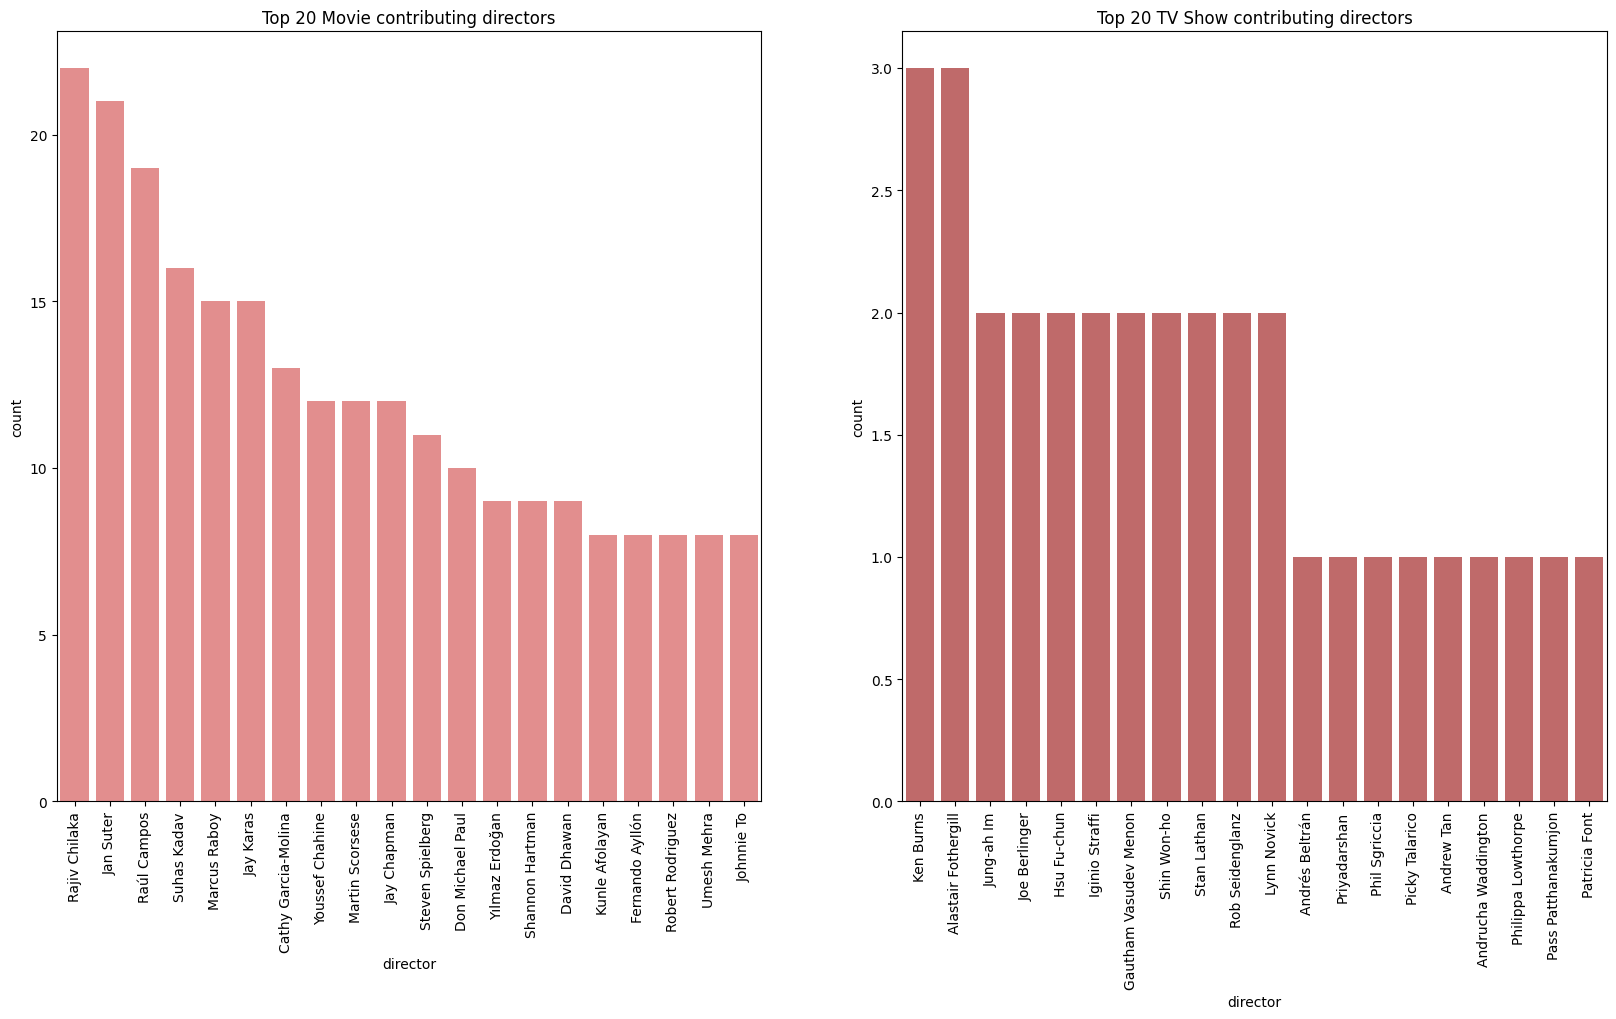

In [73]:
# Below group of graphs show the top 20 movies and tv shows producing directors.
# Observations ->
# 1. Rajiv Chilaka has directed the most number of movies by a single director.
# 2. Ken Burns and Alastair Fothergill has director most number of TV shows by a single director.
top_20_director = final[['title','director','type']].drop_duplicates(keep='first')[['director','type']].value_counts(ascending=False).reset_index()
top_20_director_movie = top_20_director[(top_20_director['type']=='Movie') & (top_20_director['director']!='Unknown Director')][0:20]
top_20_director_tv = top_20_director[(top_20_director['type']=='TV Show') & (top_20_director['director']!='Unknown Director')][0:20]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Top 20 Movie contributing directors')
sns.barplot(data = top_20_director_movie,x='director',y='count',color='lightcoral')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Top 20 TV Show contributing directors')
sns.barplot(data = top_20_director_tv,x='director',y='count',color='indianred')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_20_directors_content_73.png')
plt.show()

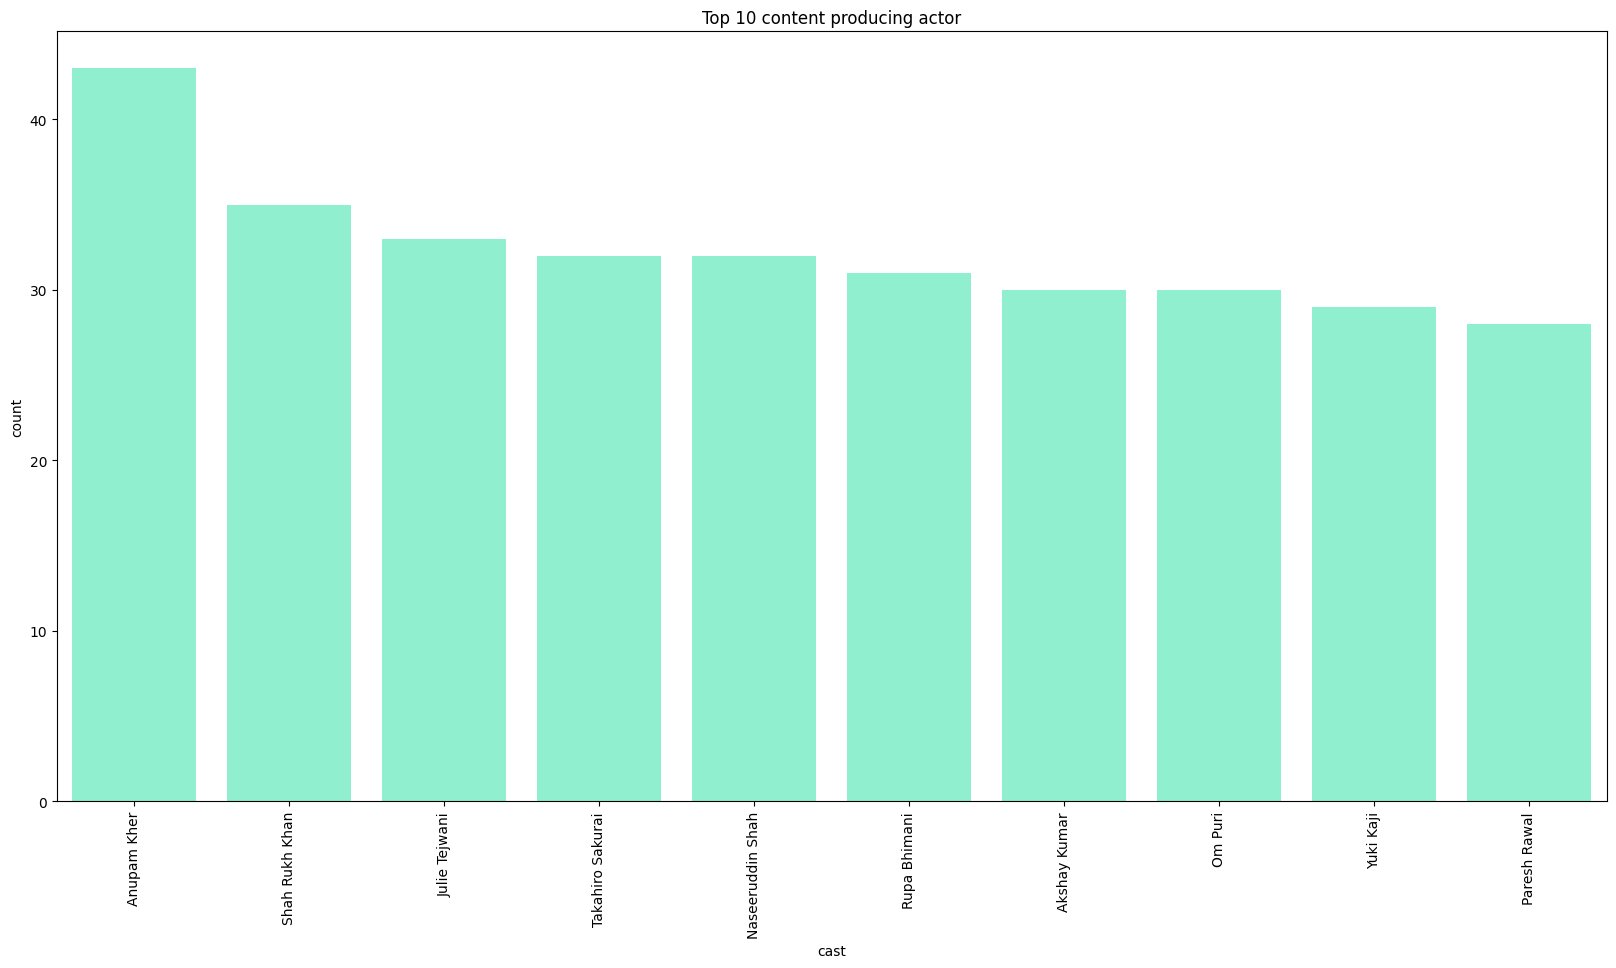

In [74]:
# Below graph show the Top 20 actors whose has acted in the available content on the platform.
# Observation ->
# Anupam Kher has acted in the most number of contents by a single actor.
top_20_cast = final[final['cast']!='Unknown Cast'][['title','cast']].drop_duplicates(keep='first')[['cast']].value_counts(ascending=False).reset_index()[0:10]
plt.figure(figsize=(20,10))
sns.barplot(data = top_20_cast,x='cast',y='count',color='aquamarine')
plt.title('Top 10 content producing actor')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_10_actor_74.png')
plt.show()

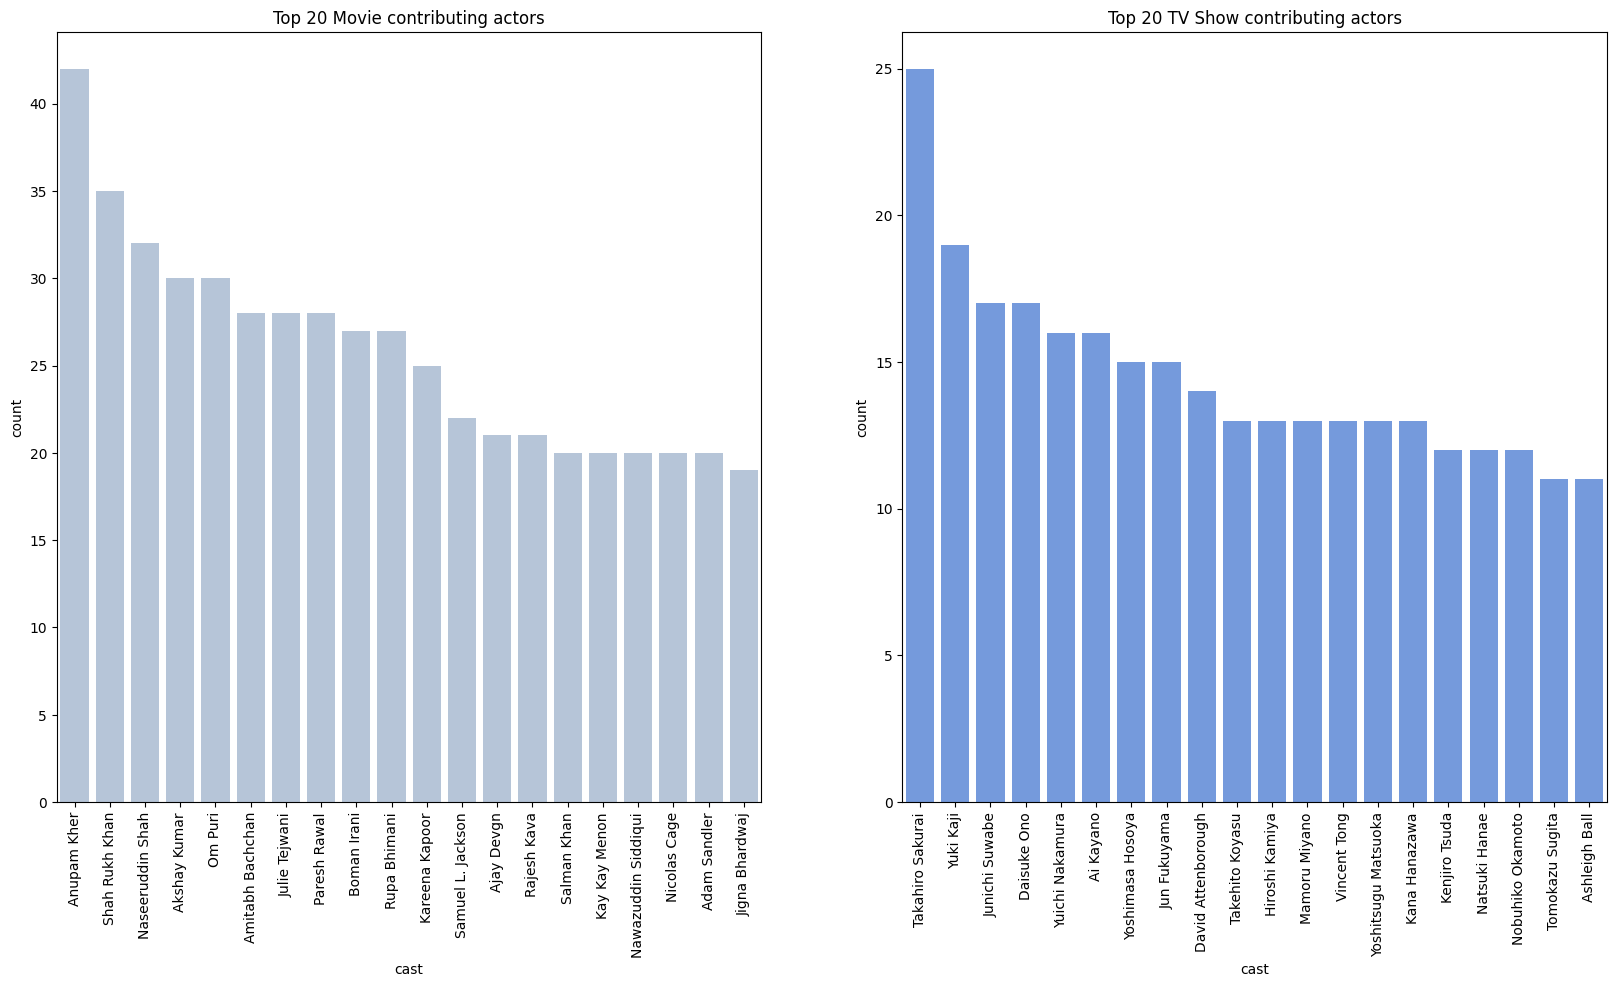

In [75]:
# Below group of graphs show the Top 20 actors who has acted in movies and tv shows.
# Observations ->
# 1. Anupam Kher has acted in the most number of movies by a single actor.
# 2. Takahiro Sakurai has acted in the most number of tv shows by a single actor.
top_20_cast = final[['title','cast','type']].drop_duplicates(keep='first')[['cast','type']].value_counts(ascending=False).reset_index()
top_20_cast_movie = top_20_cast[(top_20_cast['type']=='Movie') & (top_20_cast['cast']!='Unknown Cast')][0:20]
top_20_cast_tv = top_20_cast[(top_20_cast['type']=='TV Show') & (top_20_cast['cast']!='Unknown Cast')][0:20]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Top 20 Movie contributing actors')
sns.barplot(data = top_20_cast_movie,x='cast',y='count',color='lightsteelblue')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Top 20 TV Show contributing actors')
sns.barplot(data = top_20_cast_tv,x='cast',y='count',color='cornflowerblue')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_10_actor_content_75.png')
plt.show()

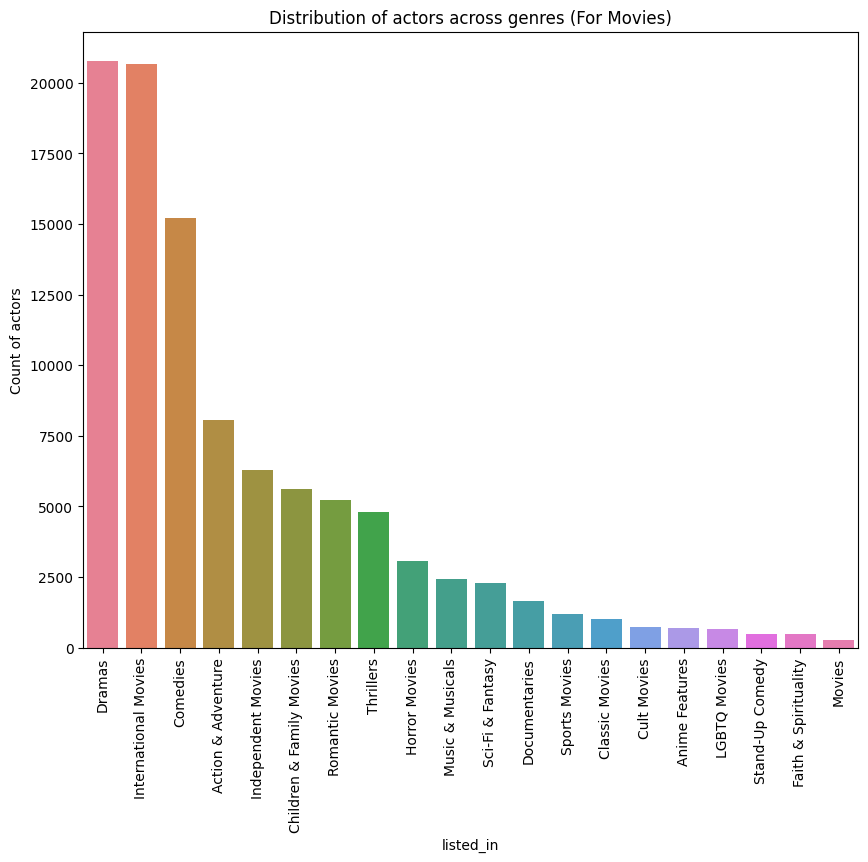

In [76]:
# Below barplot shows the count of actors having their content across different genres of movies.
# Observation ->
# Dramas and International movies genres are leading in terms of number of actors having their content in that particular genre.
cast_genre = final[final['type']=='Movie'][['cast','listed_in','title']].drop_duplicates()[['cast','listed_in']].groupby('listed_in').count().reset_index().sort_values(by='cast',ascending=False)
plt.figure(figsize=(10,8))
plt.title('Distribution of actors across genres (For Movies)')
sns.barplot(data=cast_genre,x = 'listed_in',y='cast',hue='listed_in')
plt.ylabel('Count of actors')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_actor_movie_genre_76.png')
plt.show()

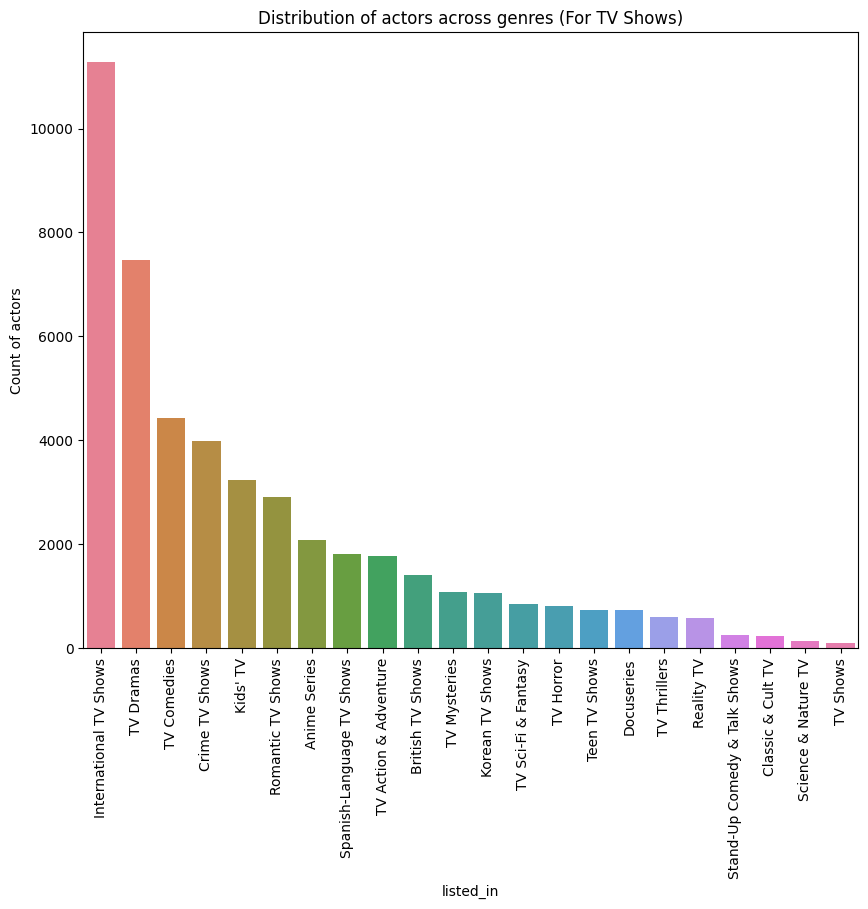

In [77]:
# Below barplot shows the count of actors having their content across different genres of tv shows.
# Observation ->
# International TV Shows genre is leading in terms of number of actors having their content in that particular genre.
cast_genre = final[final['type']=='TV Show'][['cast','listed_in','title']].drop_duplicates()[['cast','listed_in']].groupby('listed_in').count().reset_index().sort_values(by='cast',ascending=False)
plt.figure(figsize=(10,8))
plt.title('Distribution of actors across genres (For TV Shows)')
sns.barplot(data=cast_genre,x = 'listed_in',y='cast',hue='listed_in')
plt.ylabel('Count of actors')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_actor_tv_genre_77.png')
plt.show()

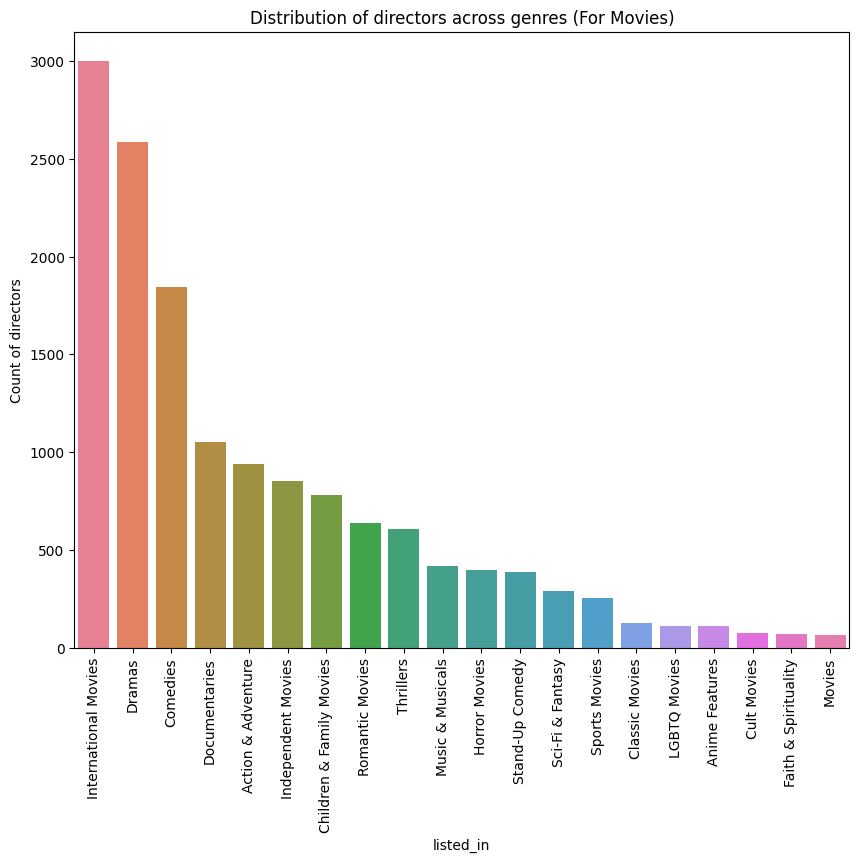

In [78]:
# Below barplot shows the count of directors having their content across different genres of movies.
# Observation ->
# International movies genres is leading in terms of number of directors having their content in that particular genre.
director_genre = final[final['type']=='Movie'][['director','listed_in','title']].drop_duplicates()[['director','listed_in']].groupby('listed_in').count().reset_index().sort_values(by='director',ascending=False)
plt.figure(figsize=(10,8))
plt.title('Distribution of directors across genres (For Movies)')
sns.barplot(data=director_genre,x = 'listed_in',y='director',hue='listed_in')
plt.ylabel('Count of directors')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_director_movie_genre_78.png')
plt.show()

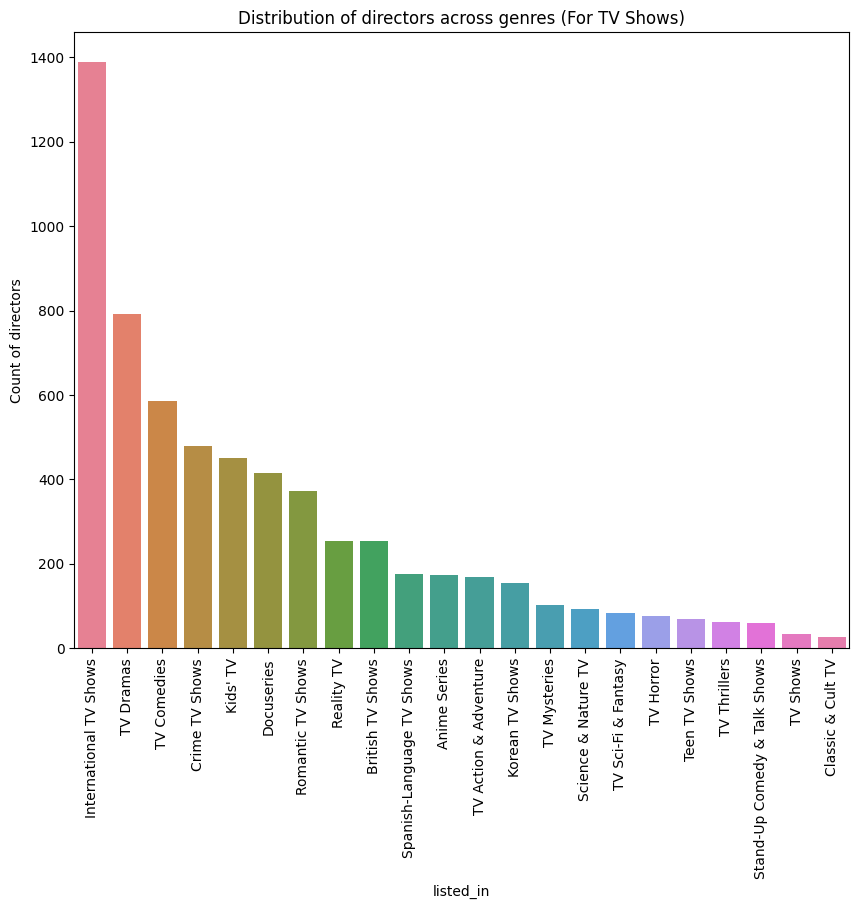

In [79]:
# Below barplot shows the count of directors having their content across different genres of tv shows.
# Observation ->
# International TV shows genres is leading in terms of number of directors having their content in that particular genre.
director_genre = final[final['type']=='TV Show'][['director','listed_in','title']].drop_duplicates()[['director','listed_in']].groupby('listed_in').count().reset_index().sort_values(by='director',ascending=False)
plt.figure(figsize=(10,8))
plt.title('Distribution of directors across genres (For TV Shows)')
sns.barplot(data=director_genre,x = 'listed_in',y='director',hue='listed_in')
plt.ylabel('Count of directors')
plt.xticks(rotation=90)
plt.savefig(fname='barplot_director_tv_genre_79.png')
plt.show()

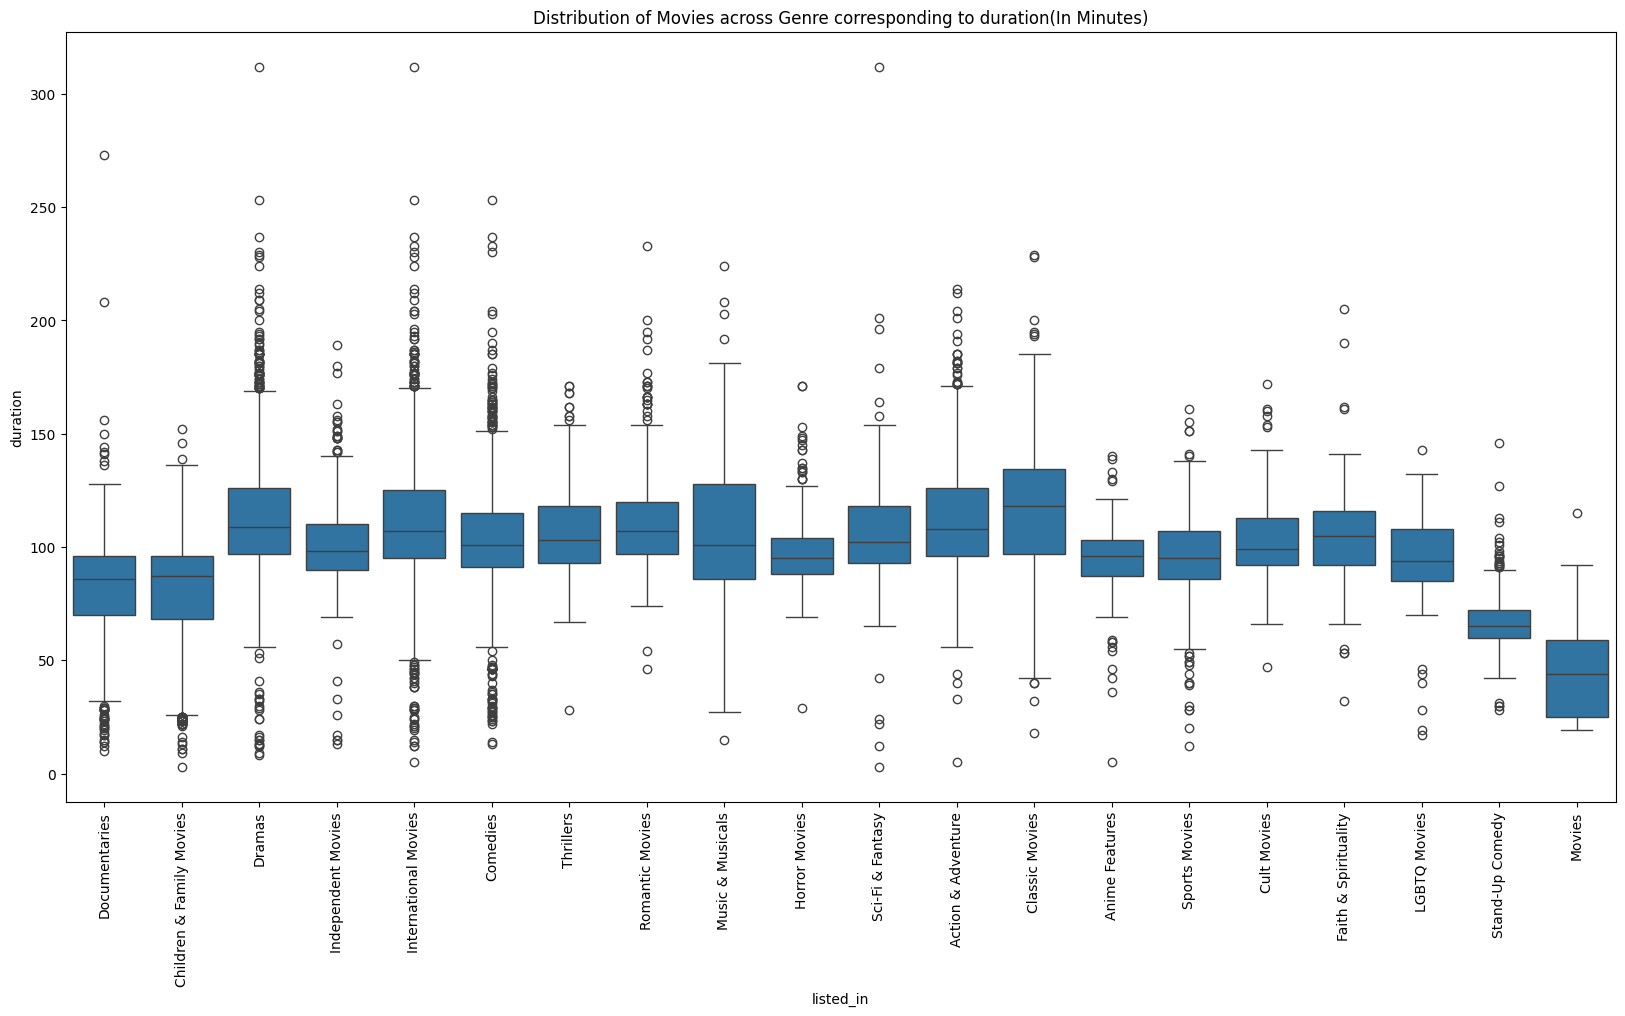

In [80]:
# Below boxplot shows distribution of movies across genres according to duration.
# Observations ->
# 1. We can see there are multiple outliers in every genre.
# 2. Classical movies have the highest median duration across genre.
# 3. Movie genre has the lowest median duration.
movie_duration = final[final['type']== 'Movie'][['title','listed_in','duration']].drop_duplicates()[['listed_in','duration']]

plt.figure(figsize=(20,10))
plt.title('Distribution of Movies across Genre corresponding to duration(In Minutes)')
sns.boxplot(data=movie_duration,x='listed_in',y='duration')
plt.xticks(rotation=90)
plt.savefig(fname='boxplot_movie_genre_duration_80.png')
plt.show()

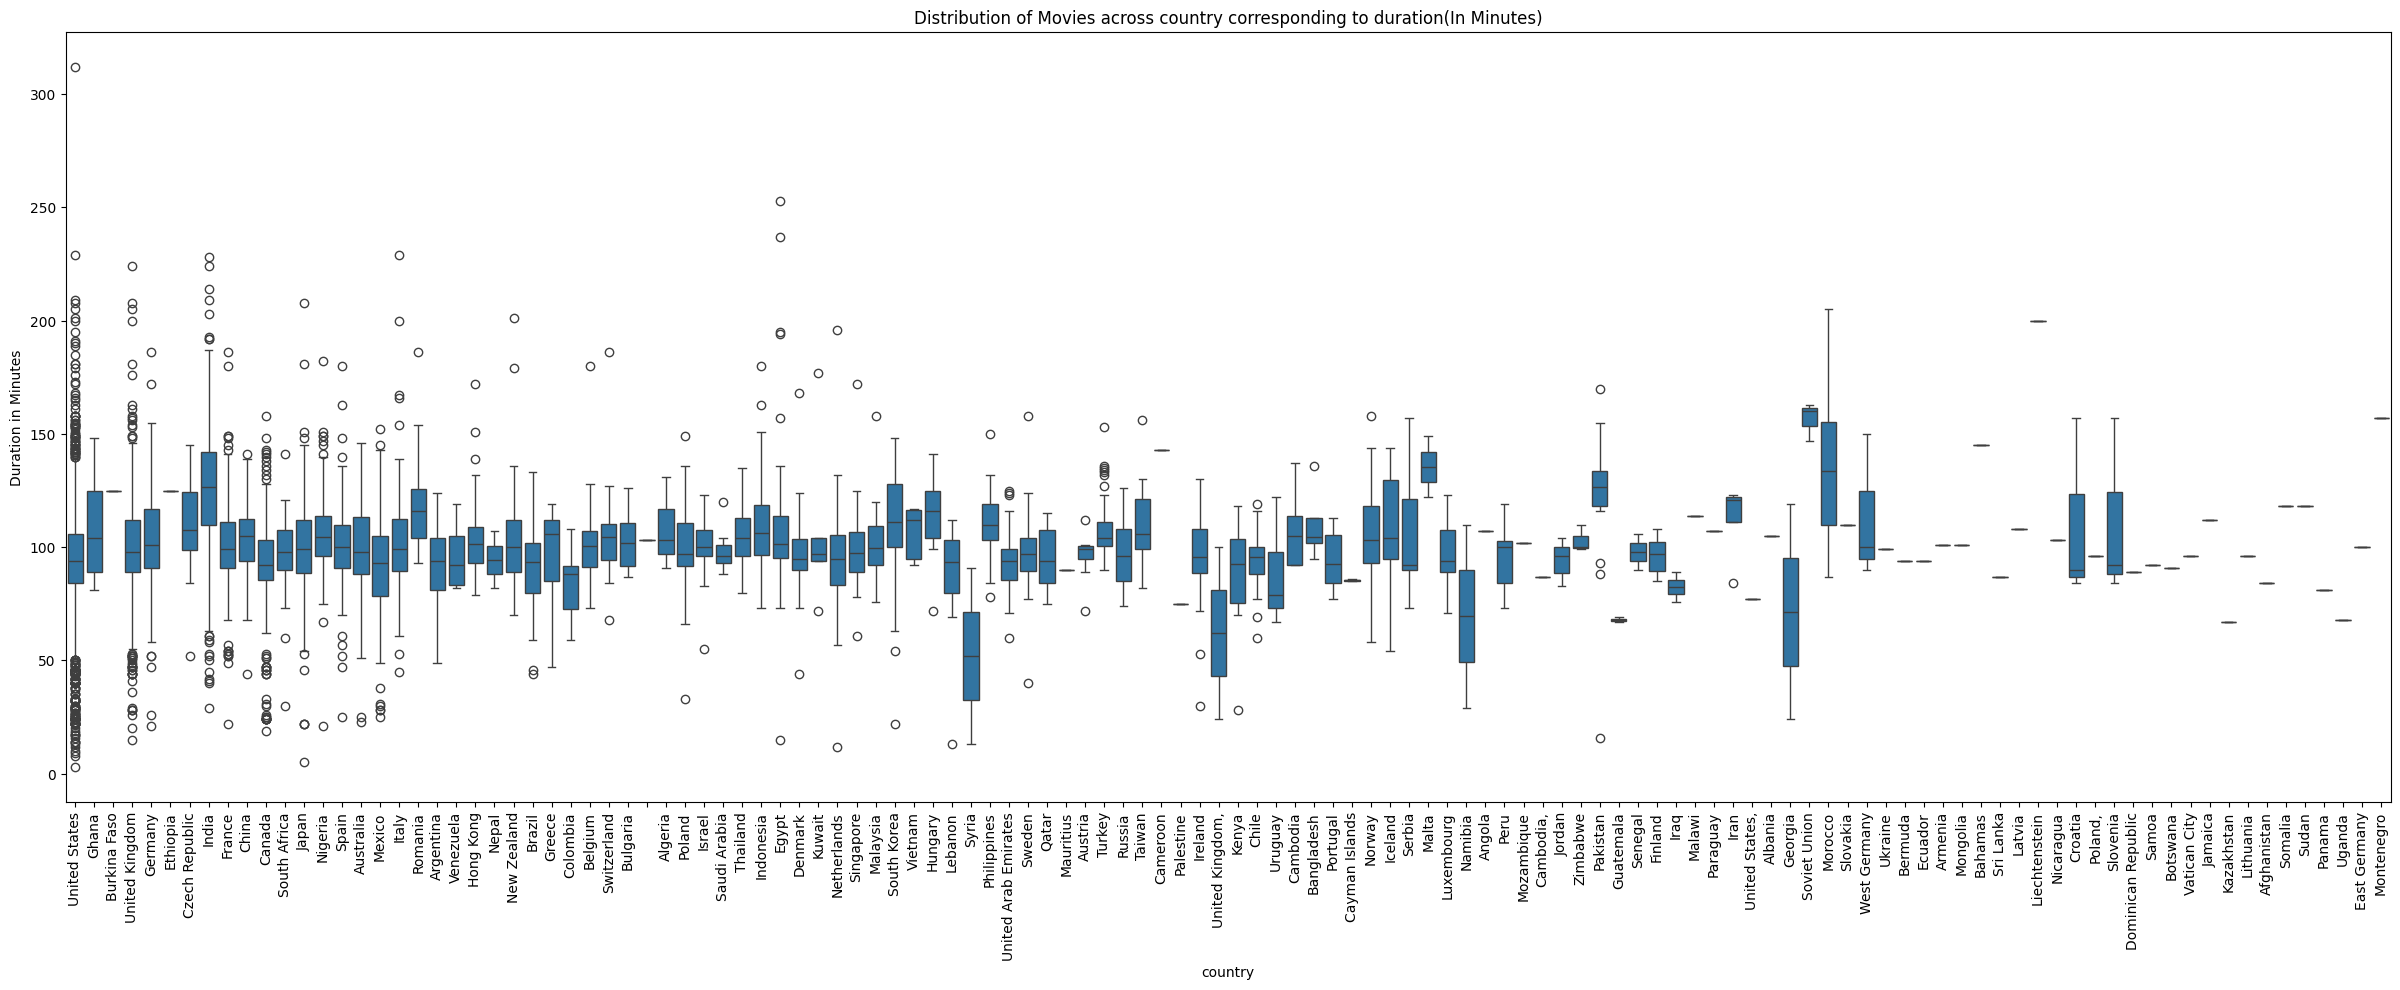

In [81]:
# Below boxplot shows distribution of Movies across countries according to duration.
# Observations ->
# 1. There is no specific patterns in terms of duration of movies for each country as there are lot of outliers.
# 2. There are many countries having very few movies so no comment can be made on their distribution.
# 3. We can see that Soviet era movies had hign median duration.
# 4. Syrian movies has lowest median duration.
country_movie_duration = final[final['type']== 'Movie'][['title','country','duration']].drop_duplicates()[['country','duration']]
plt.figure(figsize=(30,10))
plt.title('Distribution of Movies across country corresponding to duration(In Minutes)')
sns.boxplot(data=country_movie_duration[country_movie_duration['country']!='Unknown Country'],x='country',y='duration')
plt.xticks(rotation=90)
plt.ylabel('Duration in Minutes')
plt.savefig(fname='boxplot_movie_country_duration_81.png')
plt.show()

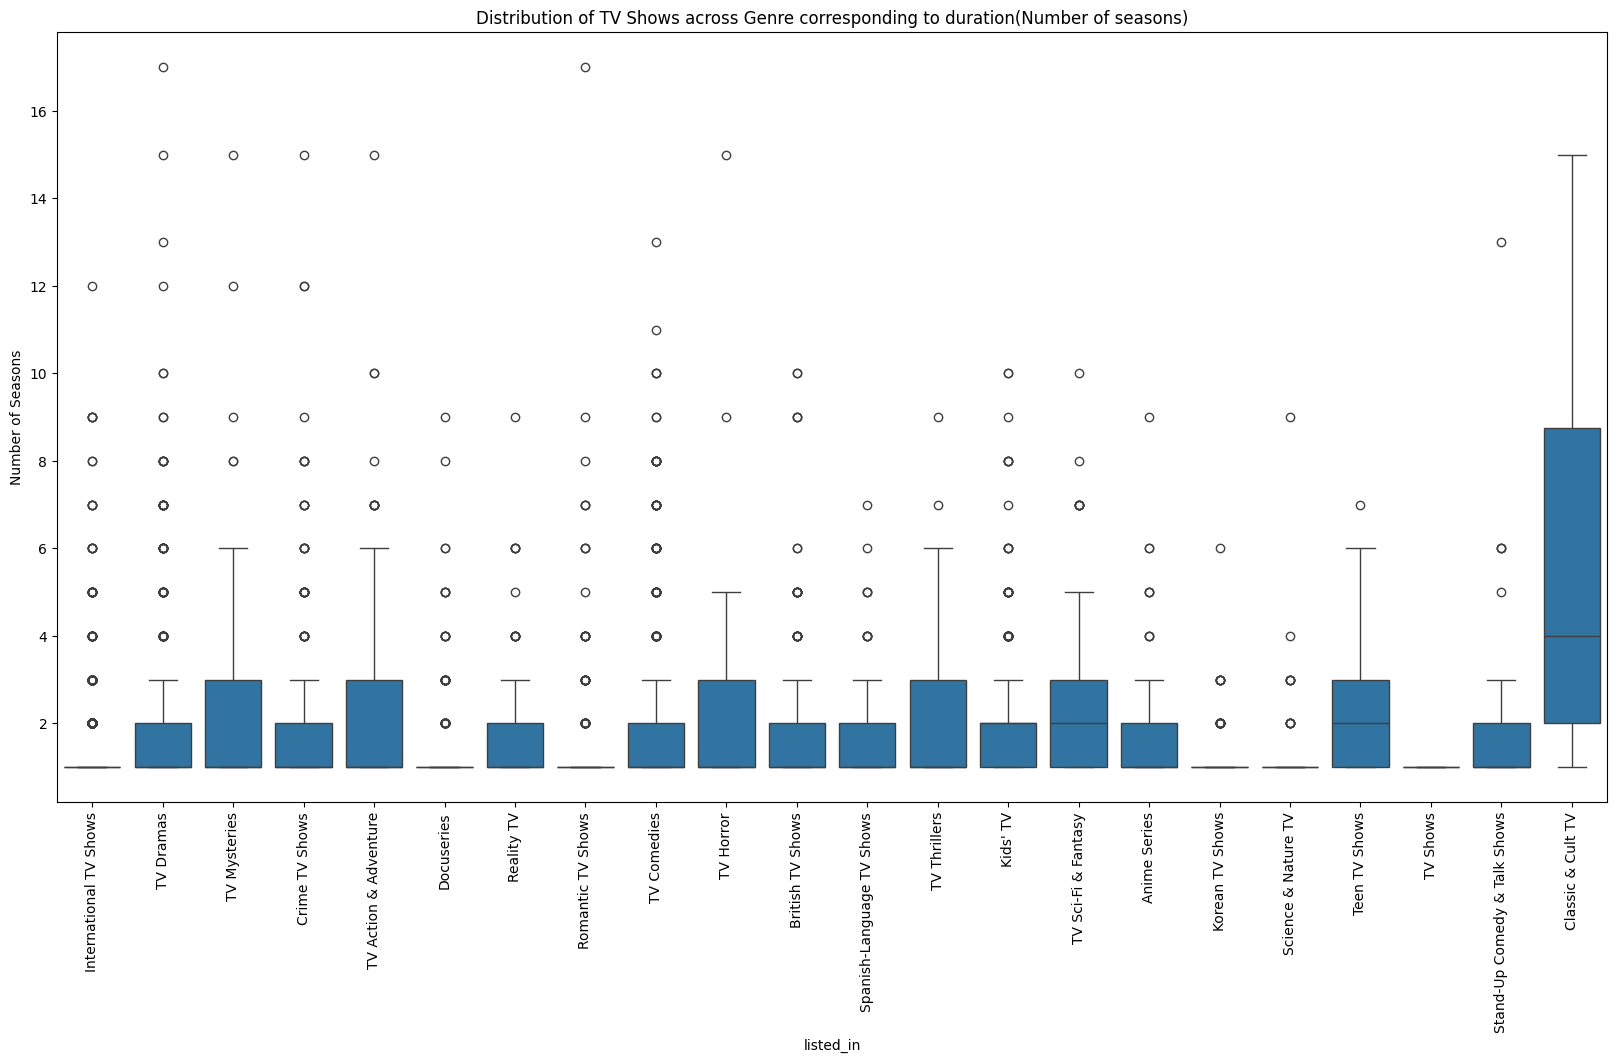

In [82]:
# Below boxplot shows distribution of TV shows across genres according to duration.
# Observations ->
# 1. We can see there are multiple outliers in every genre.
# 2. Classic & Cult Tv have the highest median duration across genre.
# 3. There are multiple genre in tv shows having only one season.
tv_duration = final[final['type']== 'TV Show'][['title','listed_in','duration']].drop_duplicates()[['listed_in','duration']]

plt.figure(figsize=(20,10))
plt.title('Distribution of TV Shows across Genre corresponding to duration(Number of seasons)')
sns.boxplot(data=tv_duration,x='listed_in',y='duration')
plt.ylabel('Number of Seasons')
plt.xticks(rotation=90)
plt.savefig(fname='boxplot_tv_genre_duration_82.png')
plt.show()

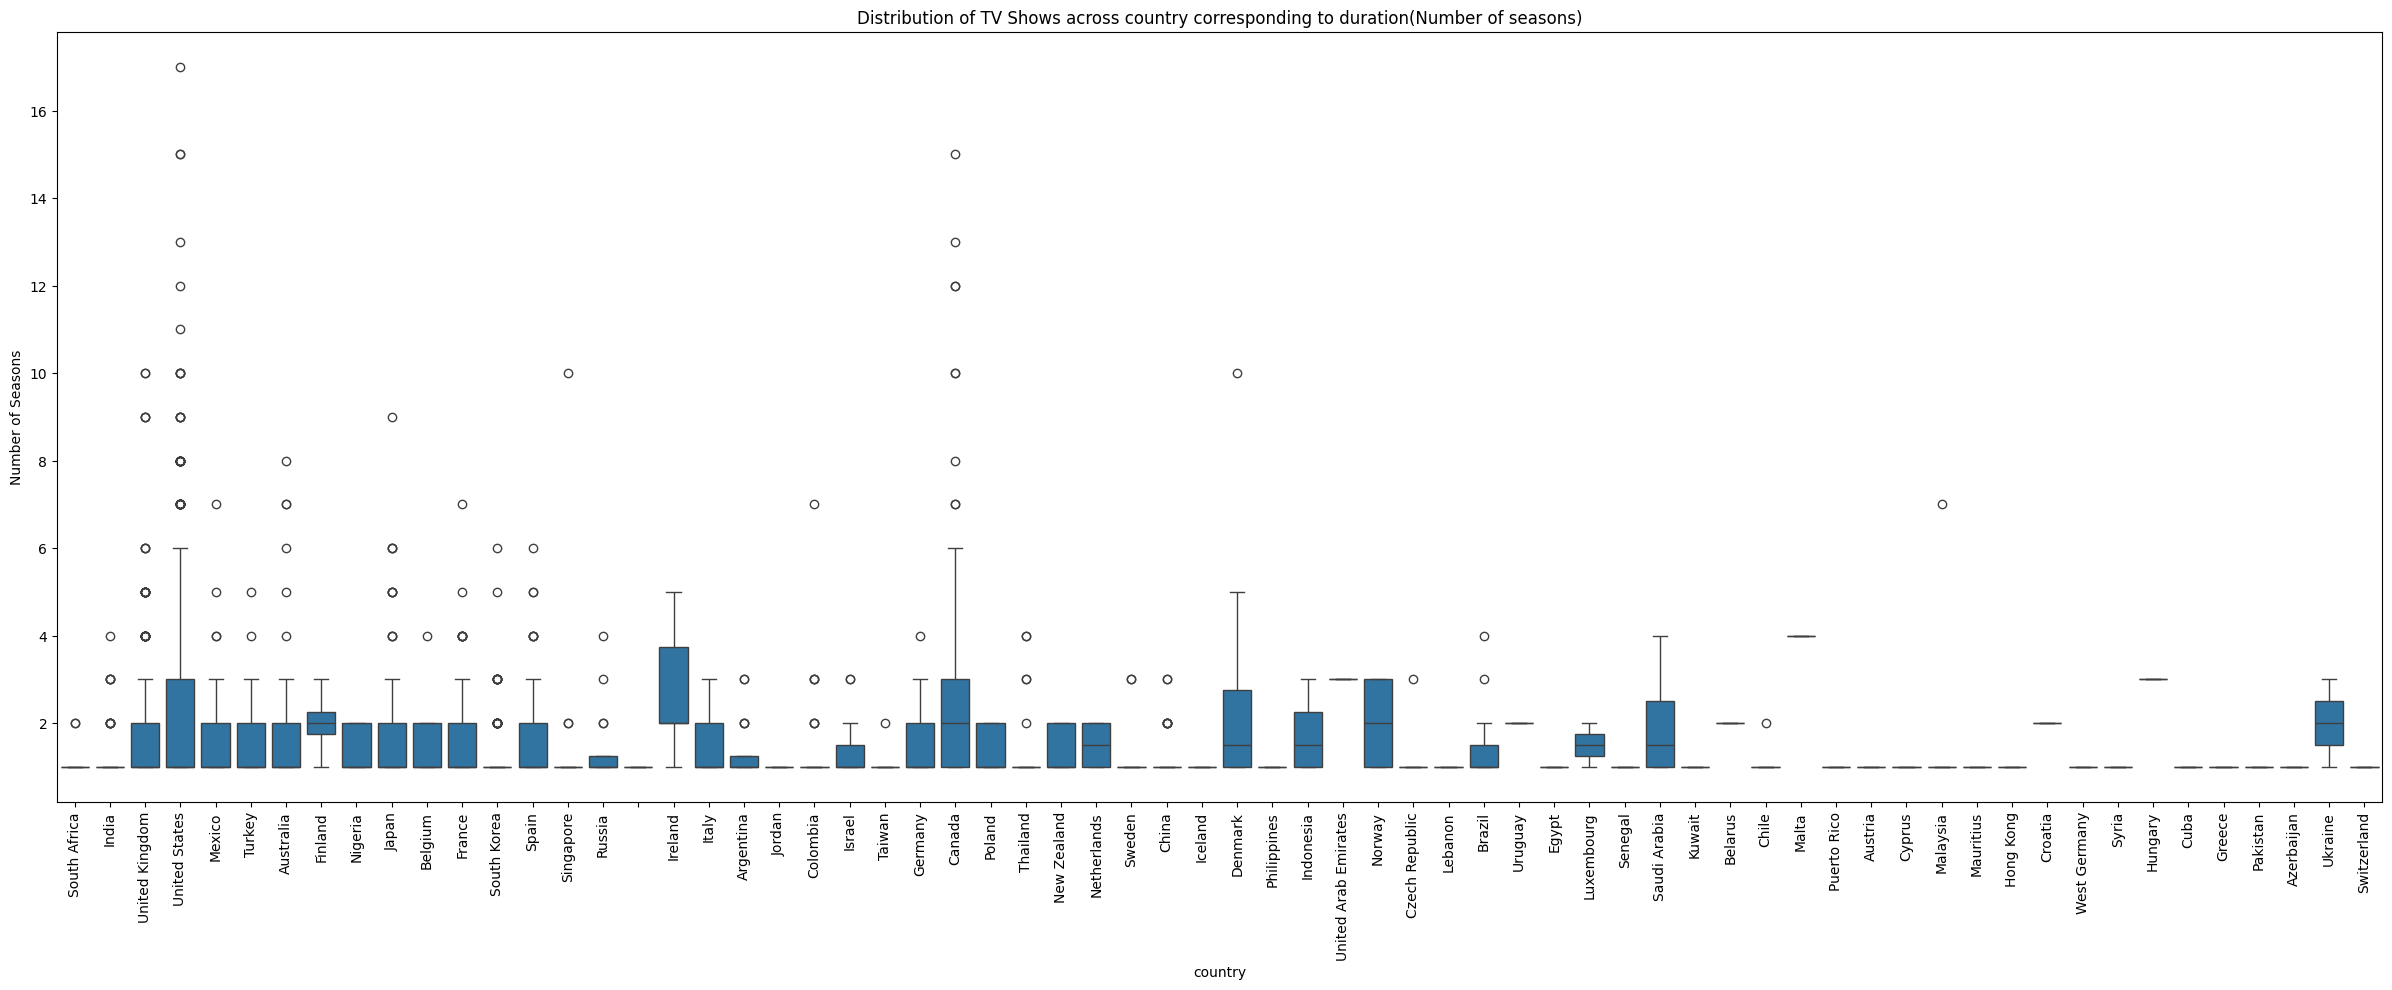

In [83]:
# Below boxplot shows distribution of TV shows across countries according to duration.
# Observations ->
# 1. Countries producing lower number of TV shows have high median duration.
# 2. Countries producing more number of TV shows have low median duration.
country_tv_duration = final[final['type']== 'TV Show'][['title','country','duration']].drop_duplicates()[['country','duration']]
plt.figure(figsize=(30,10))
plt.title('Distribution of TV Shows across country corresponding to duration(Number of seasons)')
sns.boxplot(data=country_tv_duration[country_tv_duration['country']!='Unknown Country'],x='country',y='duration')
plt.xticks(rotation=90)
plt.ylabel('Number of Seasons')
plt.savefig(fname='boxplot_tv_country_duration_81.png')
plt.show()

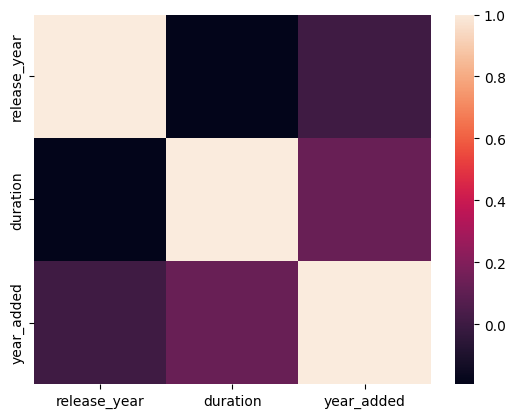

In [84]:
# Below heatmap shows the correlation between release_year, duration & year_added for movies.
# Observations ->
# 1. There is a negative correlation between release year of content and duration.
# 2. There is no correlation between (release_year & year_added) and (year_added & duration). 

movies = final[final['type']=='Movie'][['release_year','duration','year_added']].drop_duplicates()
sns.heatmap(movies.corr(numeric_only=True))
plt.savefig(fname='heatmap_corr_movie_year_dur_84.png')
plt.show()

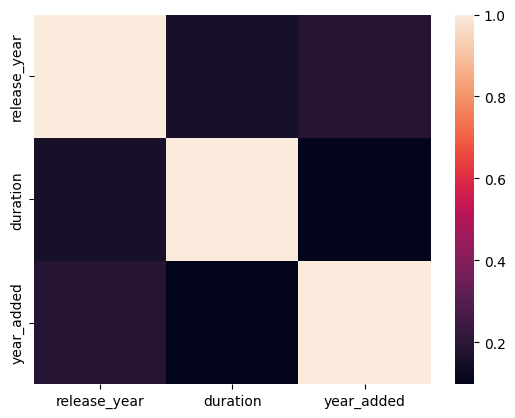

In [85]:
# Below heatmap shows the correlation between release_year, duration & year_added for TV Shows.
# Observation ->
# There is no correlation between any of the attributes.

tv = final[final['type']=='TV Show'][['release_year','duration','year_added']].drop_duplicates()
sns.heatmap(tv.corr(numeric_only=True))
plt.savefig(fname='heatmap_corr_tv_year_dur_85.png')
plt.show()

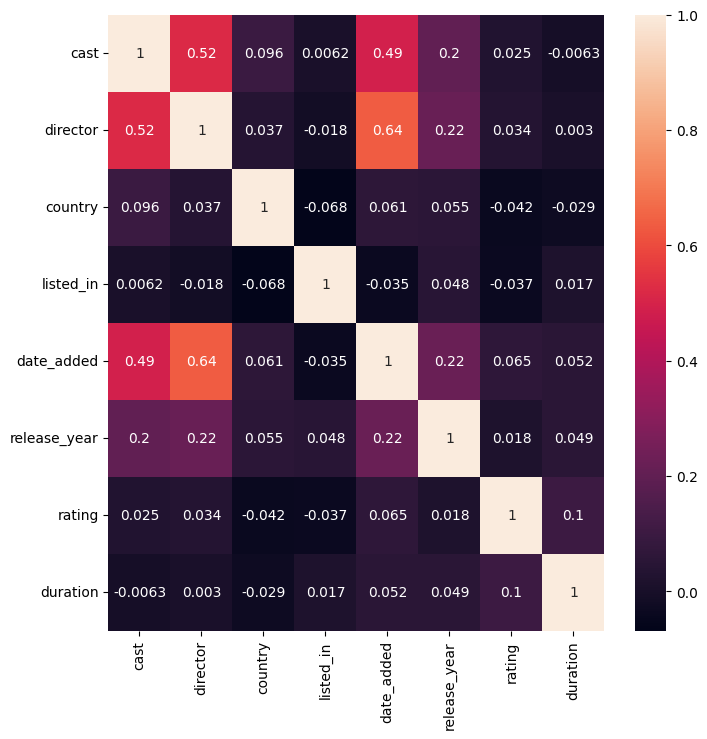

In [86]:
# Below heatmap shows the correlation between multiple attributes of movies.
# Observations ->
# 1. There is significant positive correlation between (cast and director) , (cast and date_added) and (director and date_added).
# 2. There is negative correlation between (country and genre) and (rating and country). 
movie_data_corr = final[final['type']=='Movie'][['cast', 'director', 'country', 'listed_in',
       'date_added', 'release_year', 'rating', 'duration']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

plt.figure(figsize=(8,8))
sns.heatmap(movie_data_corr,annot=True)
plt.savefig(fname='heatmap_corr_movie_attr_86.png')
plt.show()

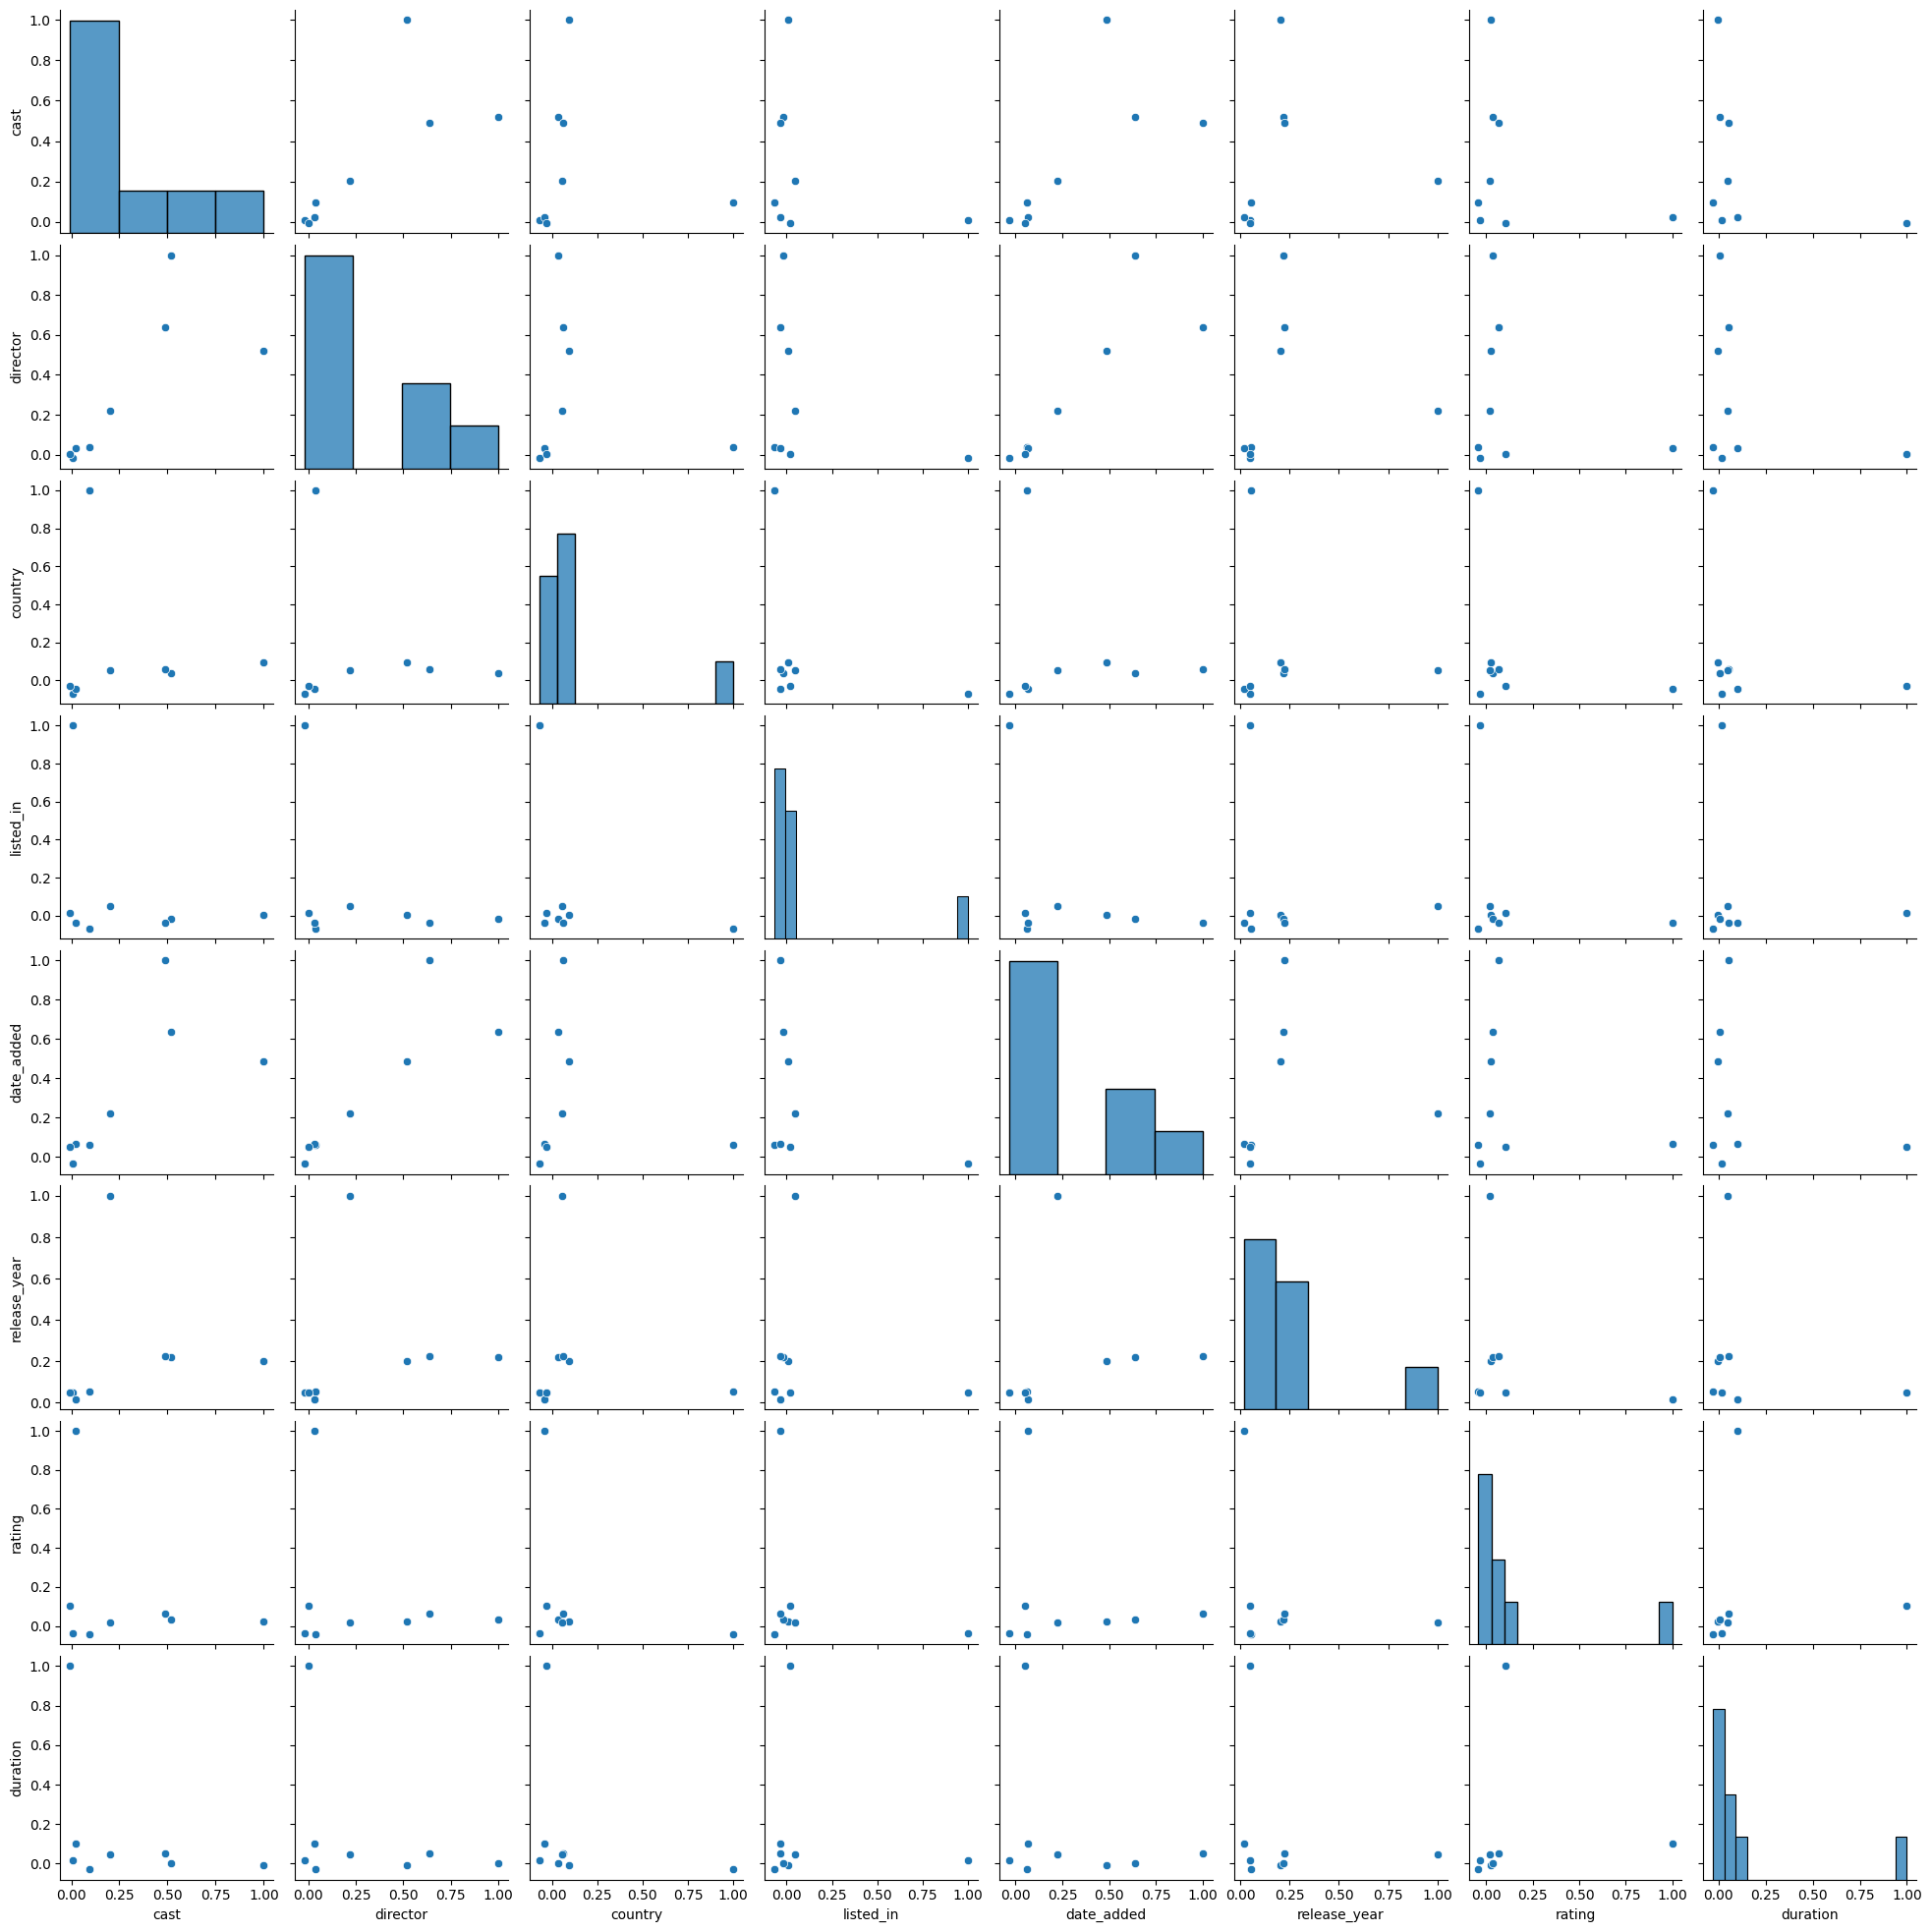

In [87]:
# Below pairplot shows the correlation between multiple attributes of movies.
# Observations ->
# 1. There is significant positive correlation between (cast and director) , (cast and date_added) and (director and date_added).
# 2. There is negative correlation between (country and genre) and (rating and country). 
sns.pairplot(movie_data_corr)
plt.savefig(fname='pairplot_corr_movie_attr_87.png')
plt.show()

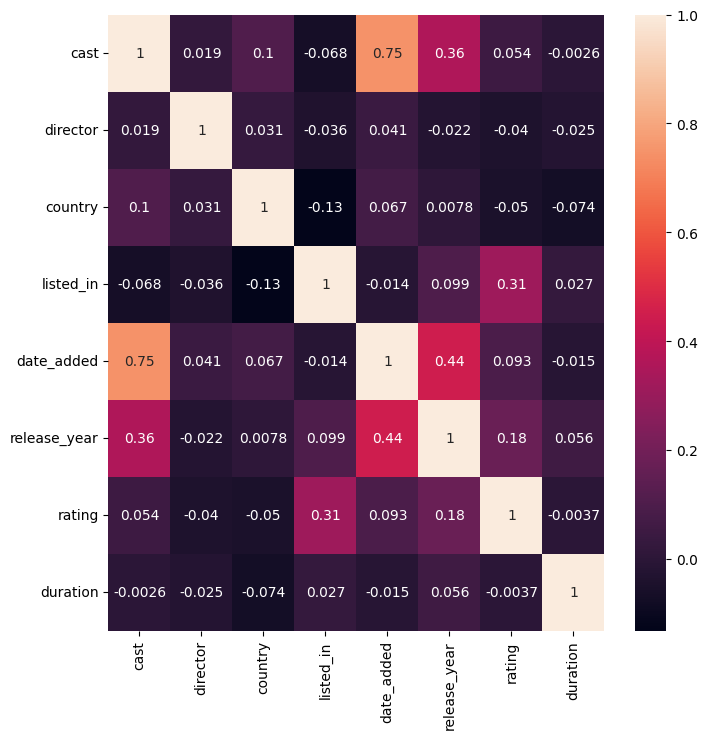

In [88]:
# Below heatmap shows the correlation between multiple attributes of TV Shows.
# Observations ->
# 1. There is significant positive correlation between (cast and release_year) and (cast and date_added).
# 2. There is significant negative correlation between (country and duration) and (cast and genre). 
tv_data_corr = final[final['type']=='TV Show'][['cast', 'director', 'country', 'listed_in',
       'date_added', 'release_year', 'rating', 'duration']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

plt.figure(figsize=(8,8))
sns.heatmap(tv_data_corr,annot=True)
plt.savefig(fname='heatmap_corr_tv_attr_88.png')
plt.show()

<Figure size 800x800 with 0 Axes>

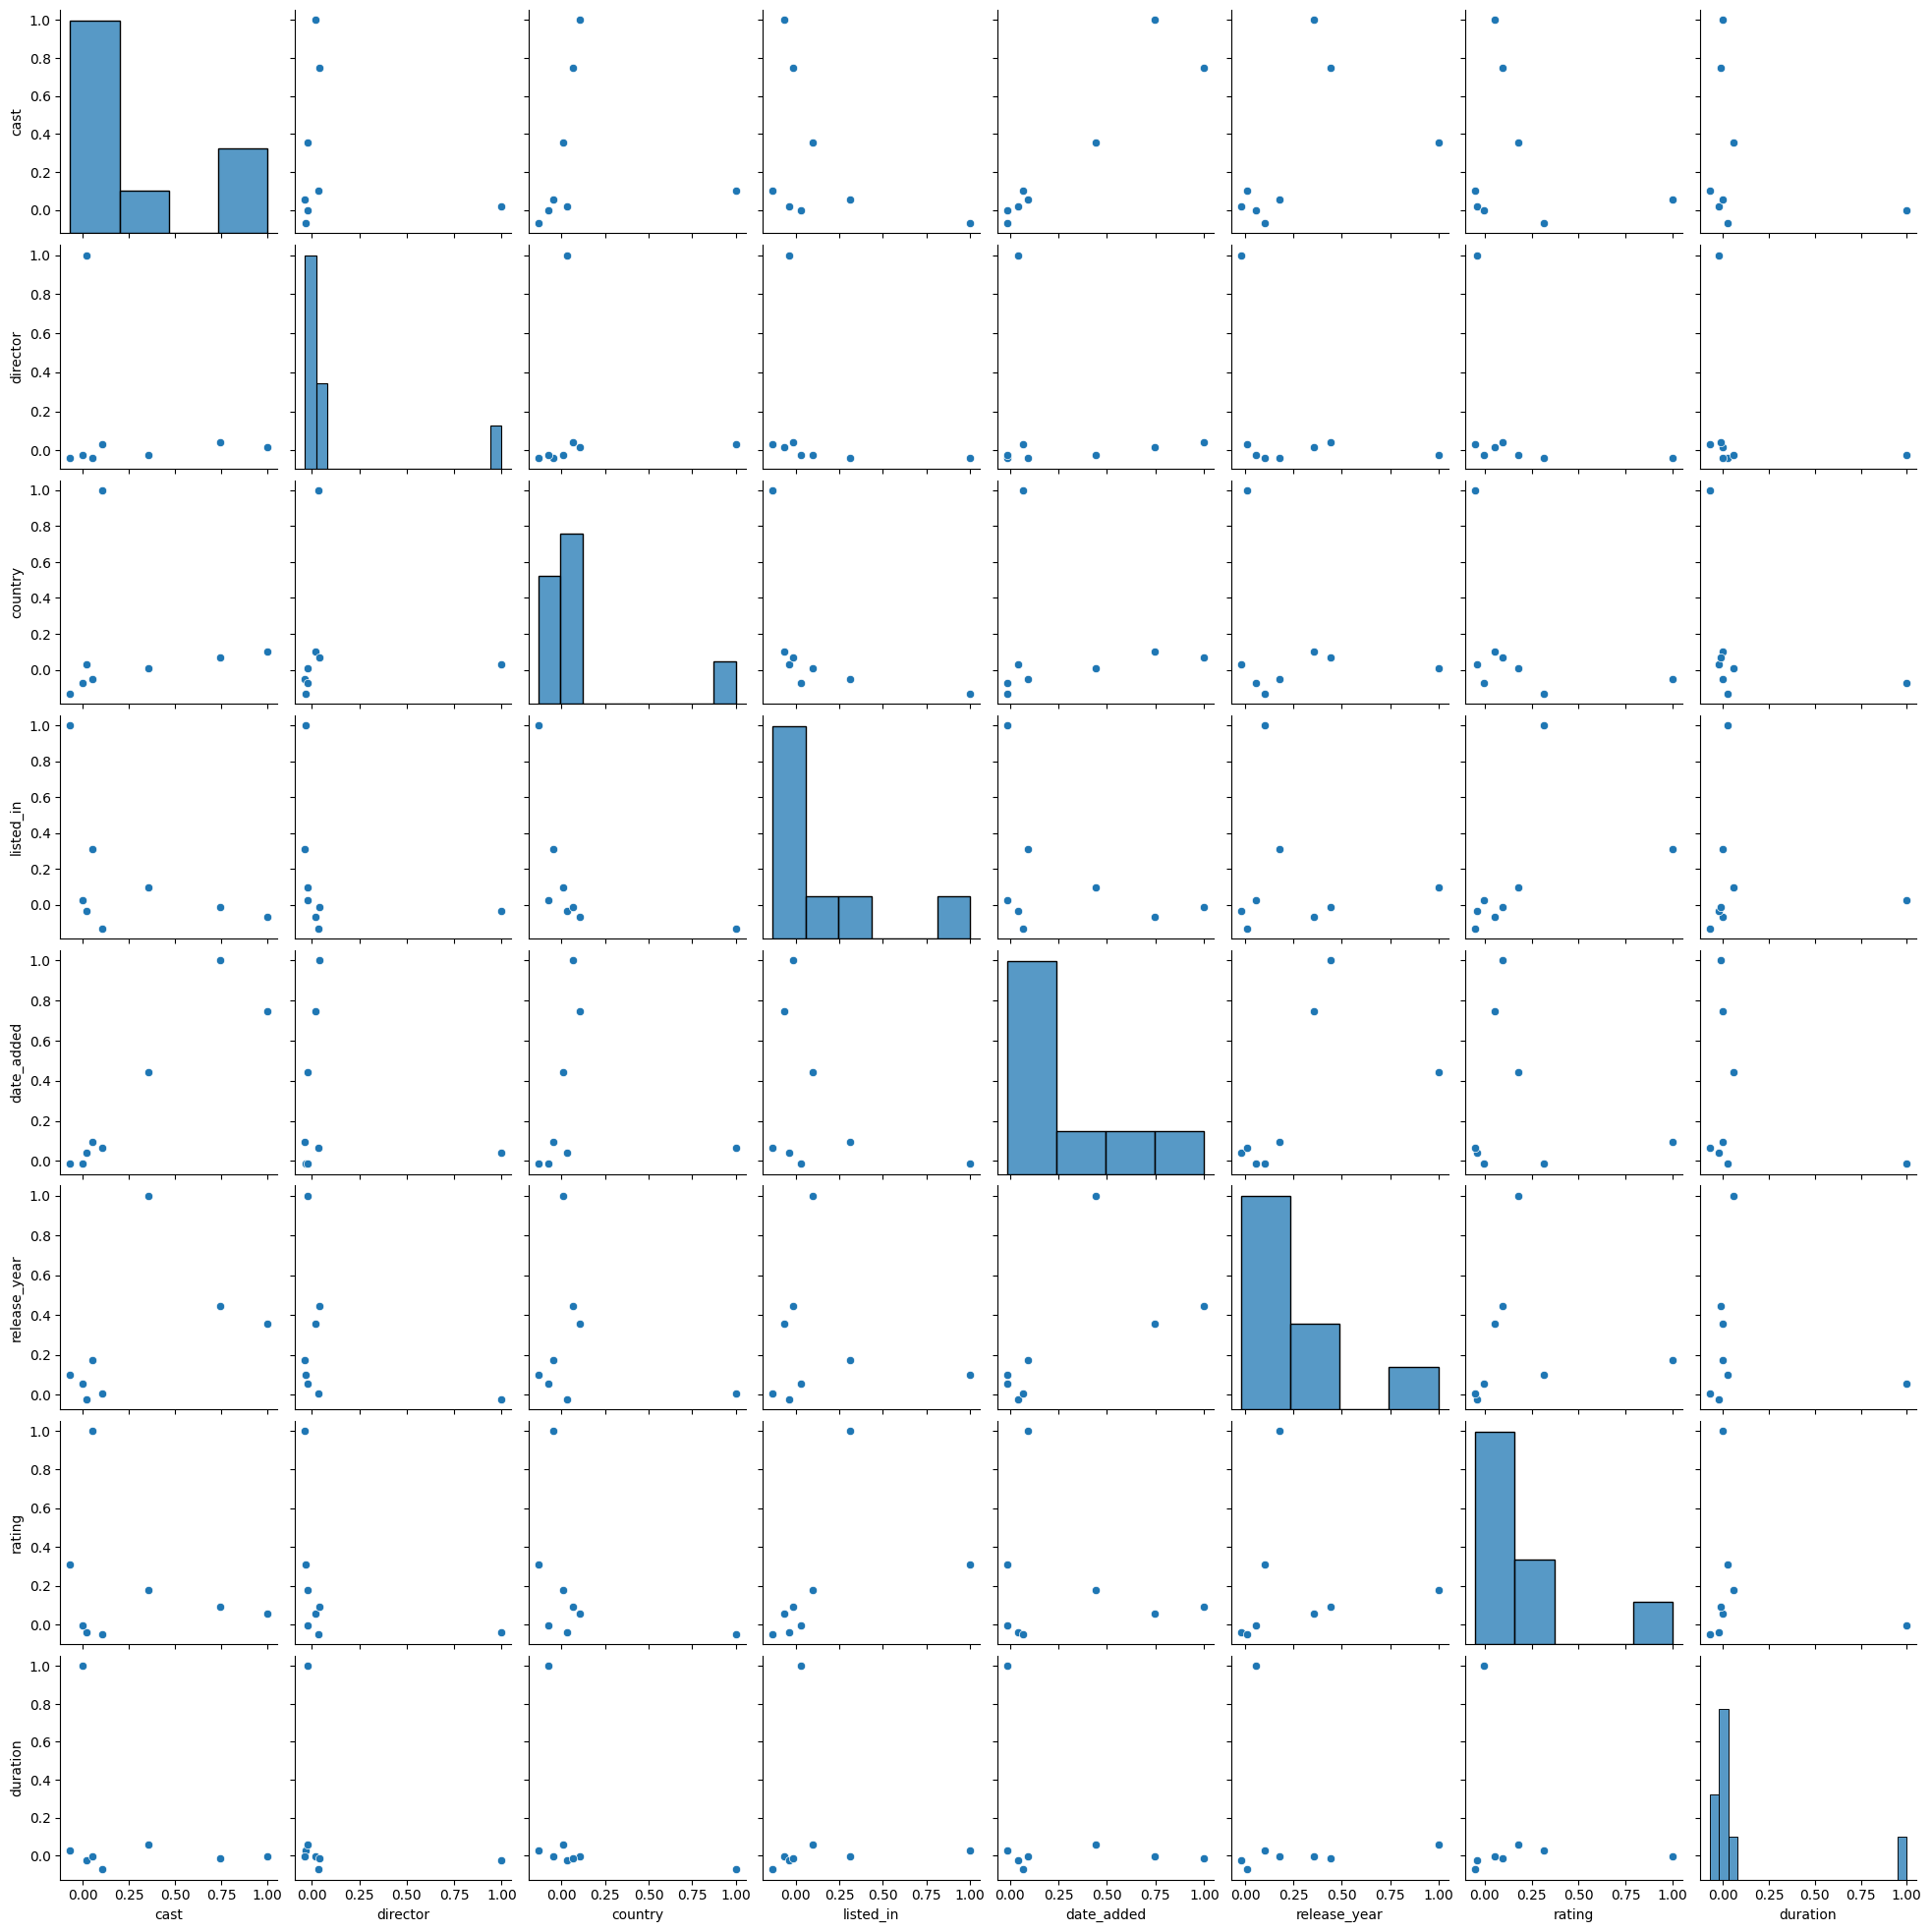

In [89]:
# Below pairplot shows the correlation between multiple attributes of TV Shows.
# Observations ->
# 1. There is significant positive correlation between (cast and release_year) and (cast and date_added).
# 2. There is significant negative correlation between (country and duration) and (cast and genre). 
plt.figure(figsize=(8,8))
sns.pairplot(tv_data_corr)
plt.savefig(fname='pairplot_corr_tv_attr_89.png')
plt.show()

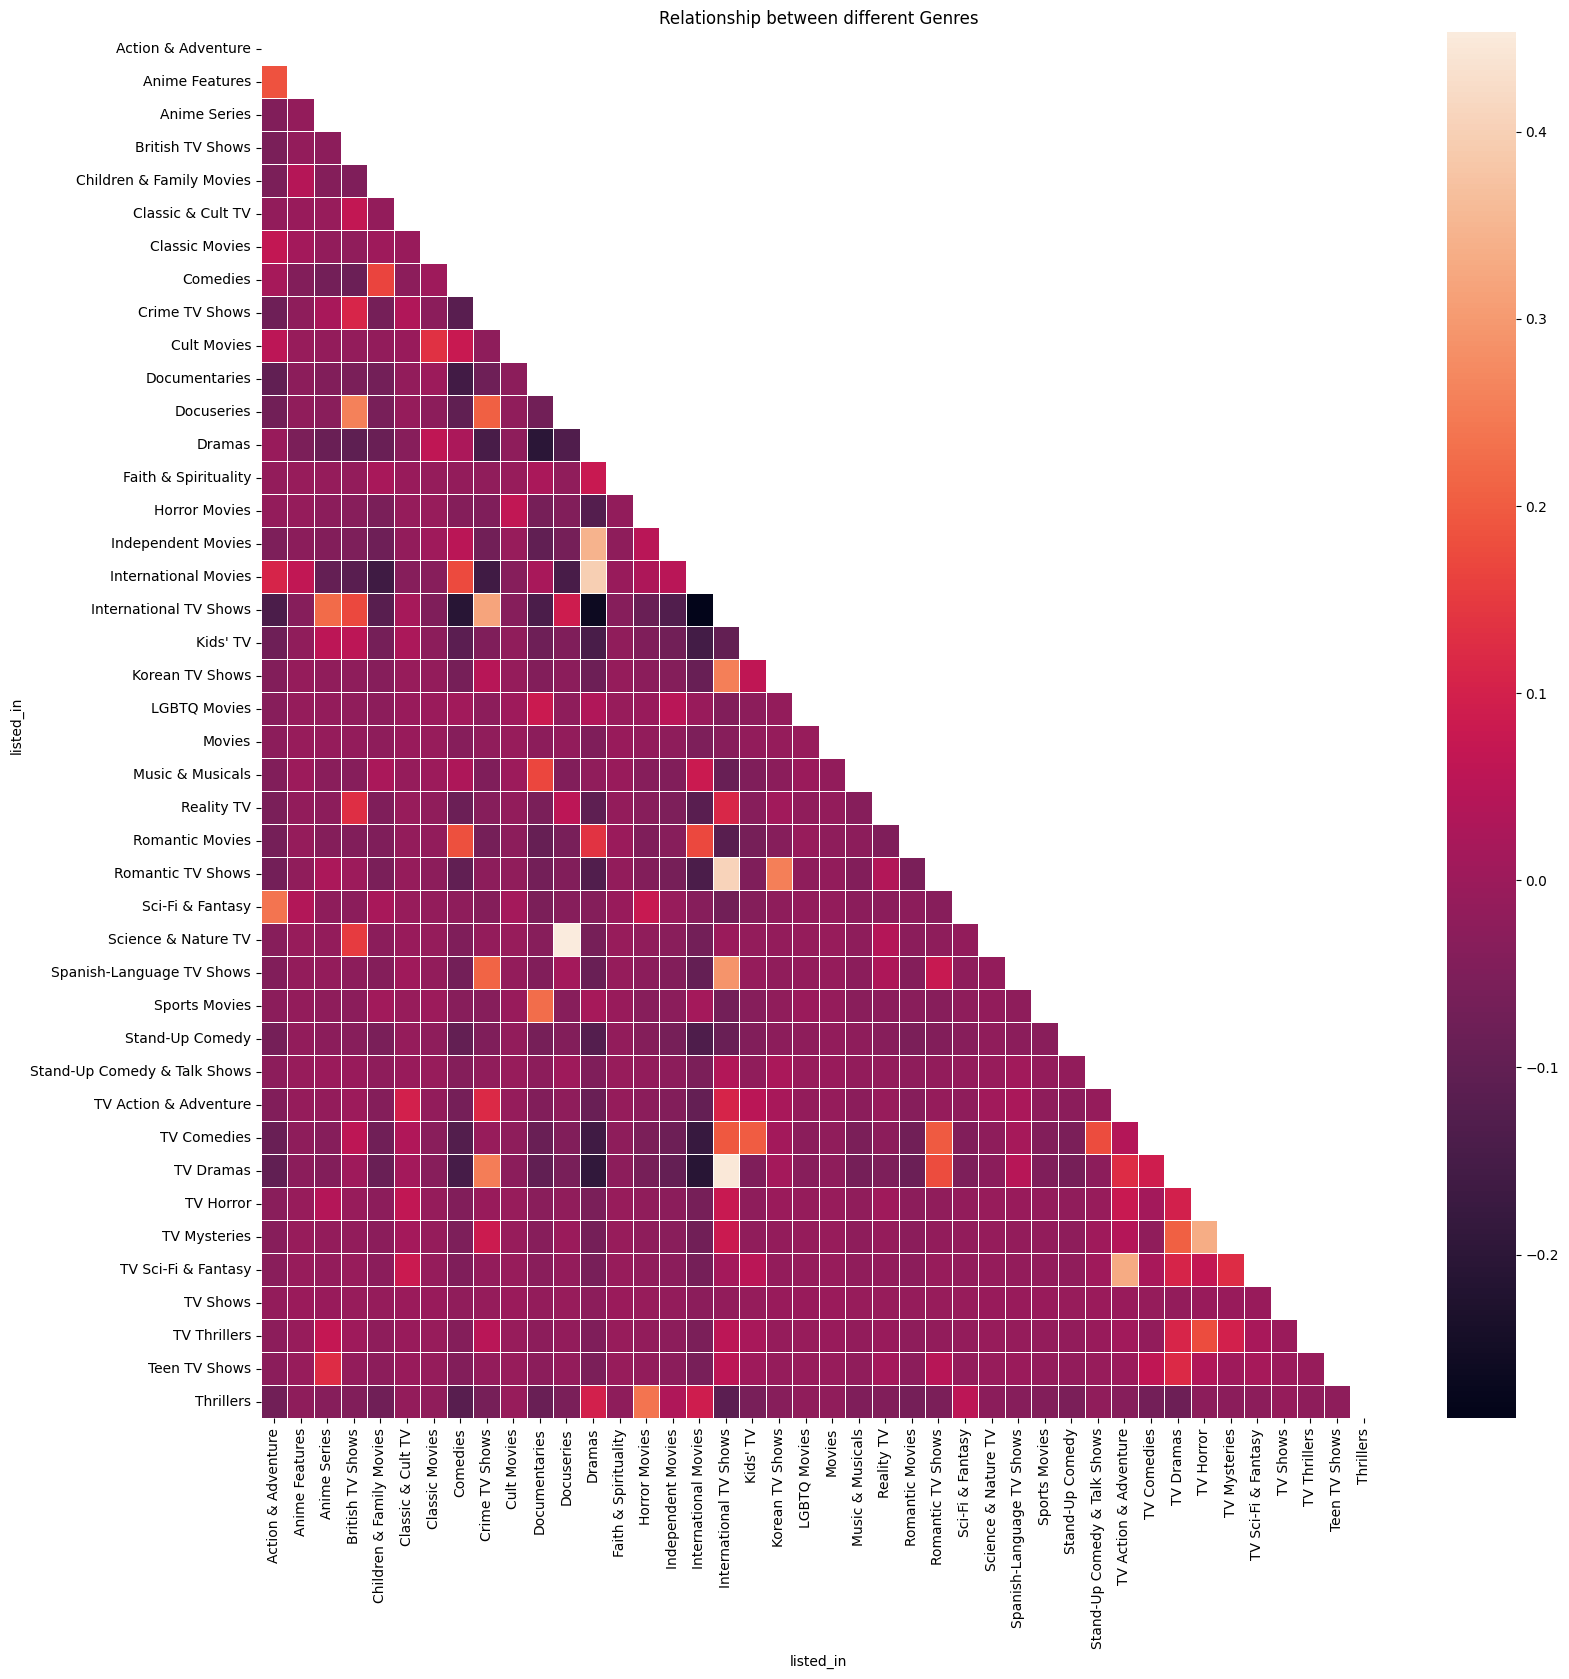

In [90]:
# Below heatmap shows correlation between different genres.
# Observations ->
# 1 .Following genres are negatively correlated :
#     -> Documentaries and Drama
#     -> International Tv Shows with Comedies and Dramas
# 2. Following genres are positively correlated :
#     -> Action & adventure with Anime Features and Sci-Fi & Fantasy
#     -> International Tv Shows and Anime Series
#     -> TV Comedies with International TV Shows and Kids' TV
#     -> Horror movies are thrillers
#     -> TV Mysteries are TV Horrors
genre = final[['title','listed_in']].drop_duplicates()
genre_corr = pd.pivot_table(genre,index='title', columns='listed_in',aggfunc=lambda x: 1,fill_value = 0).corr()
mask = np.triu(np.ones_like(genre_corr, dtype=bool))
plt.figure(figsize=(18,18))
plt.title('Relationship between different Genres')
sns.heatmap(genre_corr,mask=mask, linewidths=.5)
plt.savefig(fname='heatmap_genre_corr_90.png')
plt.show()

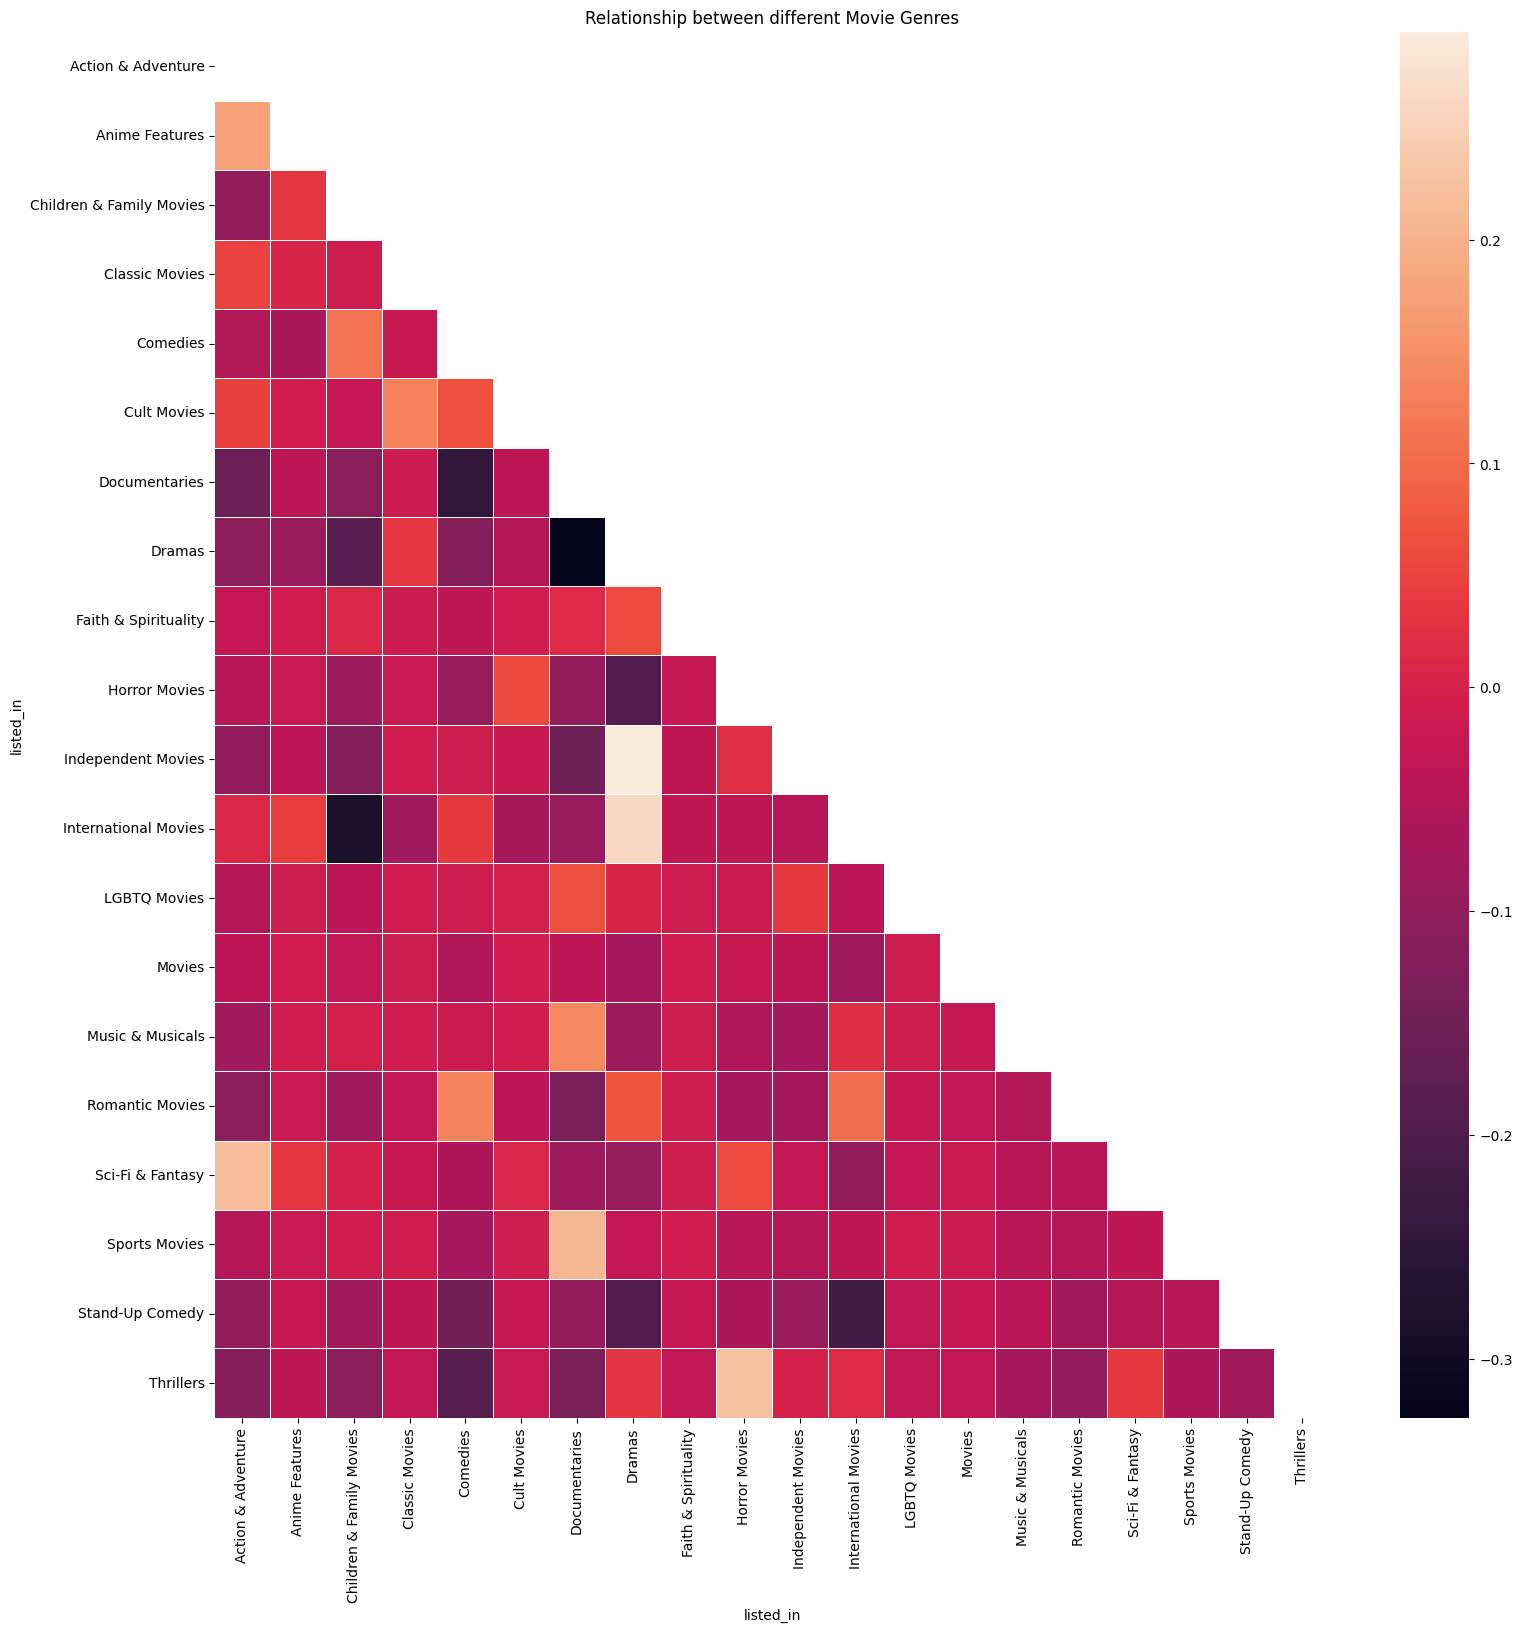

In [91]:
# Below heatmap shows correlation between different Movie genres.
# Observations ->
# 1. It's unlikely that Dramas will be documentaries too and International movies will be Children & Family movies.
# 2. It's very likely that International and Independent movies will be dramas and sports movies will be documentaries.
genre_movie = final[final['type']=='Movie'][['title','listed_in']].drop_duplicates()
genre_corr = pd.pivot_table(genre_movie,index='title', columns='listed_in',aggfunc=lambda x: 1,fill_value = 0).corr()
mask = np.triu(np.ones_like(genre_corr, dtype=bool))
plt.figure(figsize=(18,18))
plt.title('Relationship between different Movie Genres')
sns.heatmap(genre_corr,mask=mask, linewidths=.5)
plt.savefig(fname='heatmap_genre_movie_corr_91.png')
plt.show()

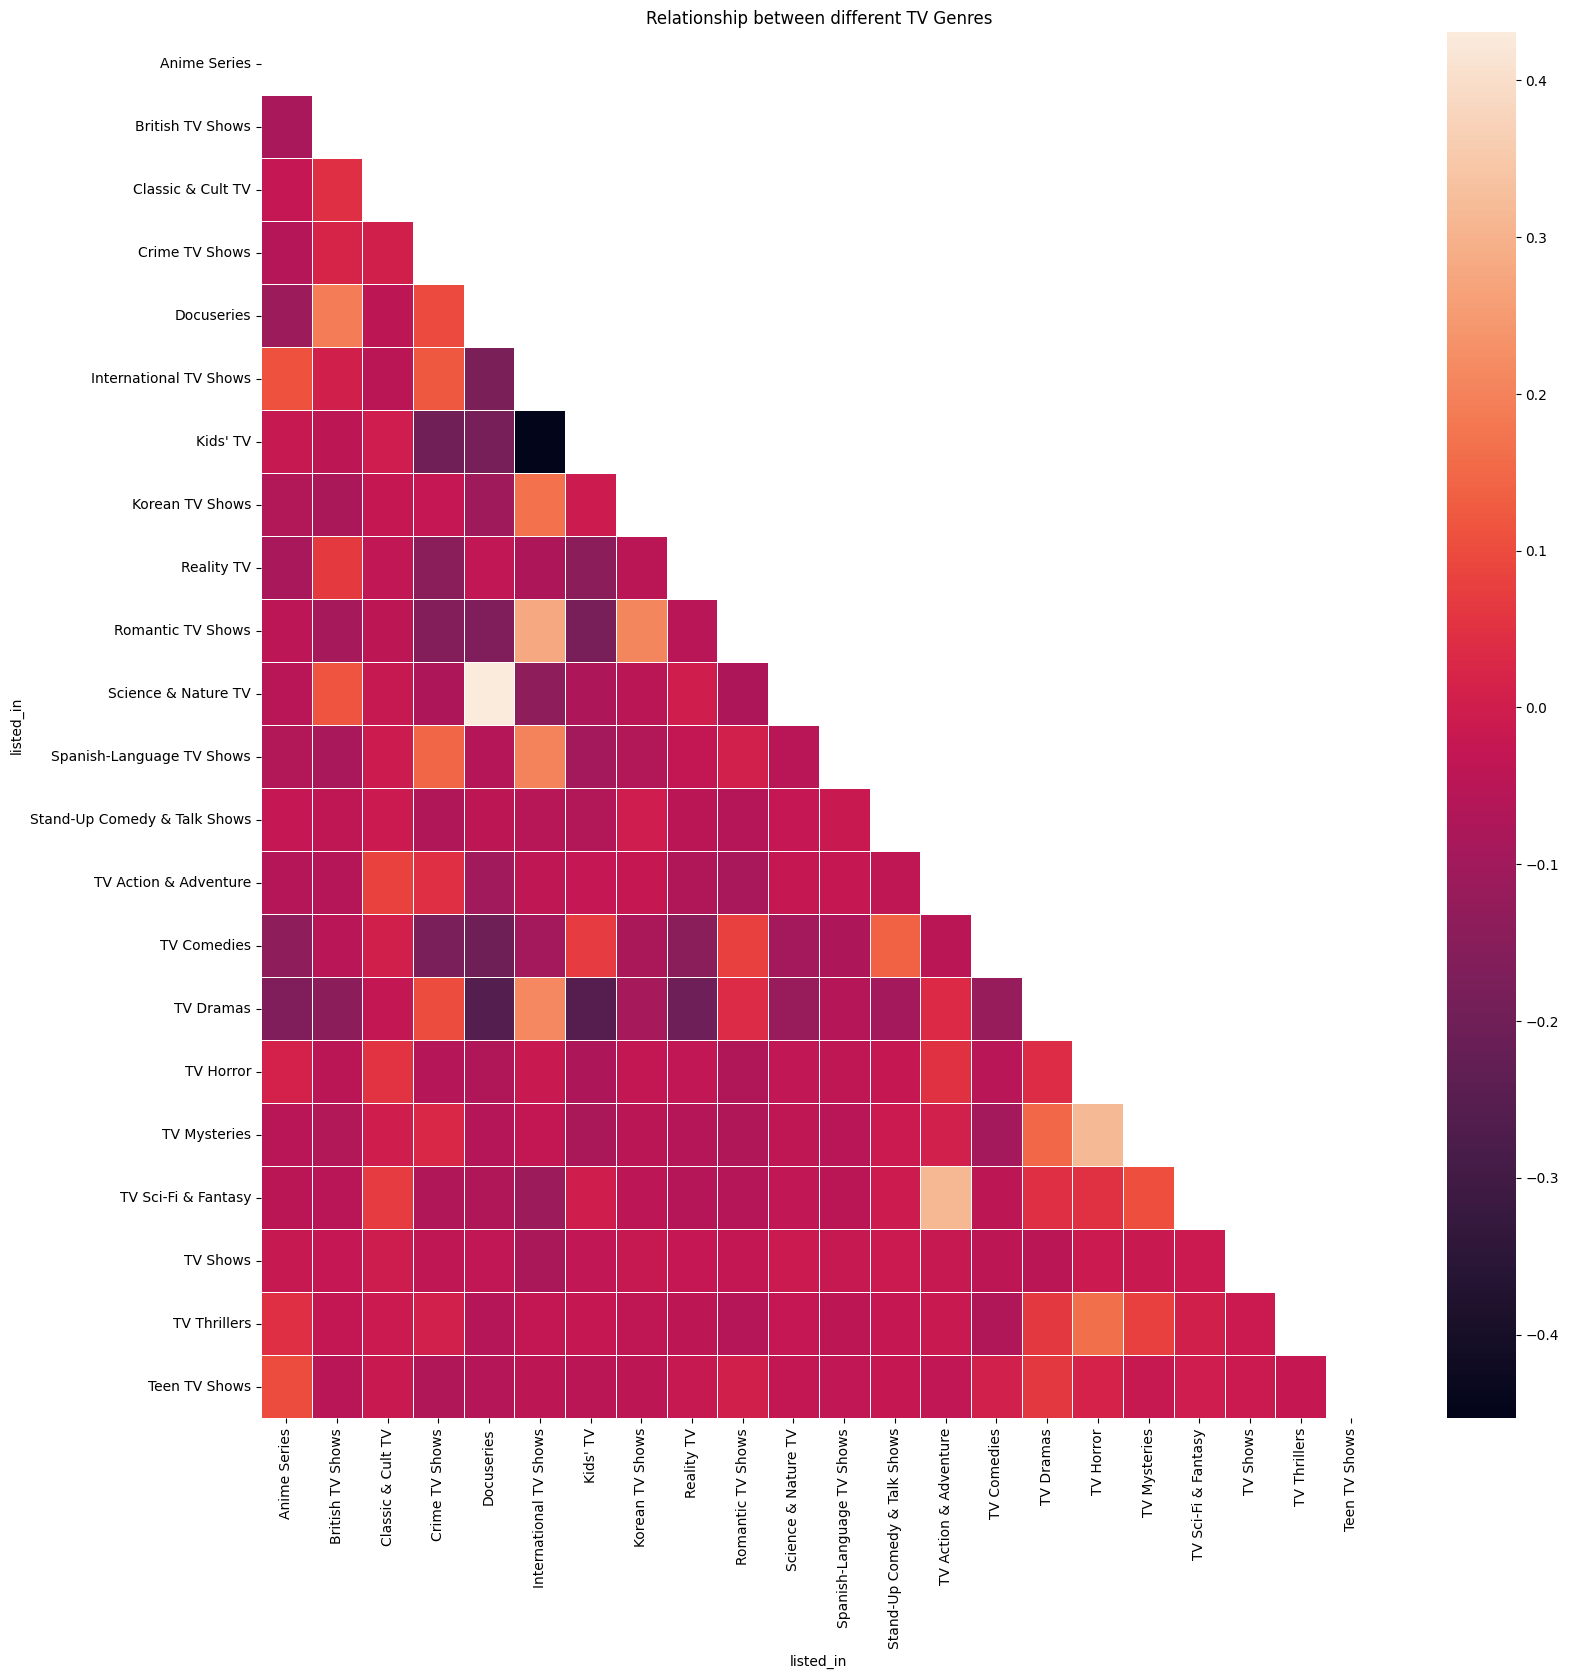

In [92]:
# Below heatmap shows correlation between different TV show genres.
# Observations ->
# 1. It's unlikely that International TV shows will be Kids TV.
# 2. It's very likely that Science & Nature TV will be Docuseries.
genre_tv = final[final['type']=='TV Show'][['title','listed_in']].drop_duplicates()
genre_corr = pd.pivot_table(genre_tv,index='title', columns='listed_in',aggfunc=lambda x: 1,fill_value = 0).corr()
mask = np.triu(np.ones_like(genre_corr, dtype=bool))
plt.figure(figsize=(18,18))
plt.title('Relationship between different TV Genres')
sns.heatmap(genre_corr,mask=mask, linewidths=.5)
plt.savefig(fname='heatmap_genre_tv_corr_92.png')
plt.show()

**Insights (The insights is based on the data without considering missing values)**


- There are two types of content available on the platform (Movies and TV shows)
- There are in total 4991 directors and 36392 actors whose content are available on the platform.
- Content is available s 127 different countries out of which movies are available in 123 countries and Tv shows are available in only 67 countries.
- Content available comprises of 42 genres and 14 different ratings.
- Median duration of movies available on the platform is 98 minutes and TV show is 1 season.
- Platform has contents released between 1925 to 2021 but 50% of the content available were released after 2017.
- There is an uneven distribution in the addition of the content on the platform. Half of the content available on the platform was added in last 3 years.
- Contribution of movies is more than double tv shows on the platform.
- There is an uneven distribution in the number of contents present in different rating categories.
- Addition of content on the platform each month is almost consistent with lowest addition in february.
- For Movies, majority of it has duration of around 100 minutes. For Tv Shows, Majority of them have less than 2 seasons.
- We can see that majority of content was added on the platform after 2015 irrespective of their release year.
- Movies released around 1950's were of shorted duration but movies released later had wide range in terms of duration.
- Majority of TV shows had less than 5 seasons.
- More than 50% of TV shows available on platform has 1 season only.
- Movies contribute to 69.7% of the content on platform and 30.3% are TV shows.
- TV-MA, TV-14, R, PG-13 & TV-PG are the topmost rated category in terms of number of movies available.
- TV-MA, TV-14, TV-PG, TV-Y7 & TV-Y are topmost rated category in terms of number of TV-shows available.
- Majority of the content was released in last 5 years.
- There are more number of movies released compared to TV shows for every year except in 2021.
- There is no significant difference between months in terms of addition of content on the platform.
- July is the month when most number of contents are added and february is when lowest number of contents are added.
- TV Shows added each month is always less compared to Movies.
- We can see that Friday is the most preferred day for content addition on platform and weekend is least preferred.
- We can see International Movies and International TV Shows are the leading Genre for Movies and Tv Show respectively.
- Out of 127 countries in which the content is available, approximately only a quarter of countries are there in which number of content available is greater than 100.
- Out of around 5k directors, only around 100 directors have their 5 or more contents available on the platform. 
- Movies and TV shows genres have lowest number of movies and tv shows respectively.
- International Movies, Dramas, Comedies, Documentaries and Action  & Adventure are the top 5 genre having the highest number of movies.
- International TV Shows, TV Dramas, TV Comedies, Crime TV Shows and Kids' TV are the top 5 genre having the highest number of tv shows.
- USA, India, UK, Canada and France has the most number of content available on the platform.
- Rajiv Chilaka has directed the most number of movies by a single director.
- Ken Burns and Alastair Fothergill has director most number of TV shows by a single director.
- Anupam Kher has acted in the most number of movies by a single actor.
- Takahiro Sakurai has acted in the most number of tv shows by a single actor.
- Dramas and International movies genres are leading in terms of number of actors having their content in that particular genre for movies.
- International TV Shows genre is leading in terms of number of actors having their content in that particular genre for tv shows.
- International movies genres is leading in terms of number of directors having their content in that particular genre for movies.
- International TV shows genres is leading in terms of number of directors having their content in that particular genre for tv shows.
- For Movies, Classical movies have the highest median duration across genre and Movie genre has the lowest median duration
- We can see that Soviet era movies had hign median duration and  Syrian movies has lowest median duration.
- For movies, Classic & Cult Tv have the highest median duration across genre and there are multiple genre in tv shows having only one season.
- For TV shows, Countries producing lower number of TV shows have high median duration and  Countries producing more number of TV shows have low median duration.
- For movies, There is significant positive correlation between (cast and director) , (cast and date_added) and (director and date_added). There is negative - correlation between (country and genre) and (rating and country).
- For Tv shows, There is significant positive correlation between (cast and release_year) and (cast and date_added) and there is significant negative correlation between (country and duration) and (cast and genre). 
- Following genres are negatively correlated :
    -> Documentaries and Drama, 
    -> International Tv Shows with Comedies and Dramas
- Following genres are positively correlated :
    -> Action & adventure with Anime Features and Sci-Fi & Fantasy,
    -> International Tv Shows and Anime Series,
    -> TV Comedies with International TV Shows and Kids' TV,
    -> Horror movies are thrillers,
    -> TV Mysteries are TV Horrors
- For movies, It's unlikely that Dramas will be documentaries too and International movies will be Children & Family movies. It's very likely that International and Independent movies will be dramas and sports movies will be documentaries.
- For tv shows, It's unlikely that International TV shows will be Kids TV and It's very likely that Science & Nature TV will be Docuseries.

**Business Insights**
- Content is available in 127 different countries out of which movies are available in 123 countries and Tv shows are available in only 67 countries. Also,  in most of the countries very few number of content is available. It seems platform is not much poplular in many small countries.
- Platform is native to United States so it has the most content availabe in that country.
- Movies are dominating tv shows in terms of amount of content on the platform.
- Rise in number of movies released started from 1980 and it continued to grow significantly till around 2020 and declined later might be due to Covid. As globalization around the world increased, entertainment industry expanded too.
- Rise in number of TV Shows released started from 2000 and it continued to grow significantly till 2020 and declined later might be due to Covid. With increase in availability of TV at homes this number has started increasing.
- Median duration of movies available on the platform is 98 minutes and TV show is 1 season. It seems most of the tv shows have their story line ending in a single season.
- Platform has contents released between 1925 to 2021 but 50% of the content available were released after 2017. Much of contents released in 20th Century are not yet added on the platform.
- USA, India, UK, Canada and France has the most number of content available on the platform. Majority of content are available in developed or developing countries.
- Out of around 5k directors, only around 100 directors have their 5 or more contents available on the platform. Most of the directors are either new to the industry or their content was not much liked.
- For TV shows, Countries producing lower number of TV shows have high median duration and  Countries producing more number of TV shows have low median duration. It seems the countries where less number of shows are available they tend to increase the number seasons.
- For movies, There is significant positive correlation between (cast and director) , (cast and date_added) and (director and date_added). There is negative - correlation between (country and genre) and (rating and country). This show that a set directors and cast prefer working together. Also, contents are added on the platform according to cast and directors.
- Most actors and directors prefer working on International movies and International TV shows..
- For Tv shows, There is significant positive correlation between (cast and release_year) and (cast and date_added) and there is significant negative correlation between (country and duration) and (cast and genre). Content on the platform is added based on the cast but it shows that cast are not sticked only to a single genre.
- Friday is the most preferred day for adding the content on the platform as there is high chance of views due to weekend following that day.
- Indian actors are leading in number of contents per actor. 

**Recommendations**
- Old classical contents should be made available on the platform as there are very few older moviess and TV shows available on the platform. This will attract older generations to use the platform.
- Netflix should come up with marketing ideas to increase the popularity of the platform in under developed nations.
- Platform can liase with directors and cast of the countries where there are very few contents available and provide them necessary help to create more contents.
- Business should work on bring more local content on the platform according to the country.
- They should also plan on increasing the amount of content on genres which has very few contents.
- We can see that directors have a preferred cast for working on their content, business can place itself between the cast and director to create an agreement between them regarding availability and understand their need so that they can work together.
- Business can interact with actors and directors through some support channel to understand and take their feedback and see business can encourage them to bring their content on the platform.
- There are a lot of countries where there are very few content, business can appoint a team to understand the entertainment industry of that particulary country and come up with measure how they can be encouraged to create more content specific to the platform.
- Only few rating categories have very high content on the platform, business should make a plan to bring more content to the platform for those rating where the amount of content is low.
- Content from variety of genres should be brought on the platform. We can see that most of the content are from International Movies and TV shows genre. More content from other popular genres should be added on the platform.